## TRANSFORMADA DE FOURIER


Este texto no ha sido revisado por un par.

Última actualización: agosto 2020, Edgar Rueda.

Carpeta auxiliar con ejemplos y más documentación: https://tinyurl.com/fisExp-III

### Referencias bibliográficas

Voelz, D. G. (2011). Computational Fourier Optics: a MATLAB tutorial. Bellingham: Spie Press.

### PARA EL PROFESOR:
- Repasar la base vectorial.
- Definir que es un número complejo.
- Representar un complejo en términos de fase y amplitud. (fórmula de Euler)

In [ ]:

# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt
from scipy.io import wavfile
import cmath as cm


%matplotlib inline
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20)
#matplotlib.rc('ytick', labelsize=20)
font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)


El siguiente código permite escondér el código

In [ ]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Pulse para codigo</button>''', raw=True)

Pulse para codigo

# 0. VARIABLE COMPLEJA

#### Base vectorial

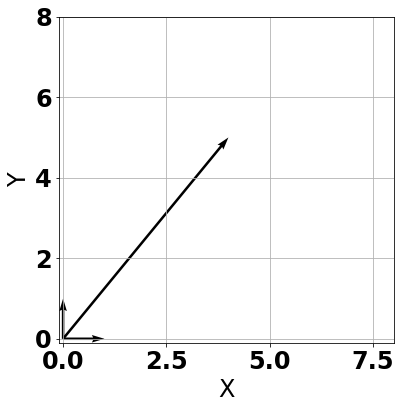

In [ ]:
soa =np.array( [ [0,0,1,0], [0,0,0,1],[0,0,4,5]])
X,Y,U,V = zip(*soa)
plt.figure(figsize=(6,6))
ax = plt.gca()
ax.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=1)
ax.set_xlim([-0.1,8])
ax.set_ylim([-0.1,8])
plt.draw()
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


$\textbf{FIGURA 1}$. Proyección de un vector en un espacio 2D.
___

En un espacio 2D podemos representar cualquier vector como la combinación lineal de dos vectores de magnitud unitaria, uno en la dirección del eje coordenado X y el otro en la dirección del eje coordenado Y:
$$\vec{R} = x \hat{x} + y \hat{y}$$

Para la gráfica el vector sería $\vec{R} = 4\hat{x} + 5\hat{y}$.
Entonces podemos decir que cualquier vector en el espacio 2D se puede describir usando la base de vectores unitarios $\left\{\hat{x},\hat{y}\right\}$.

#### Número complejo

Los números reales son el primer sistema de números que puede ser sumado, restado, multiplicado, y dividido, y se representa gráficamente en una recta. Sin embargo, ciertas ecuaciones no tienen solución en este sistema. Estas ecuaciones requieren de un nuevo número llamado imaginario, $i = \sqrt{-1}$. Su representación se da ya no en una recta, pero en un plano, el plano complejo. Este sistema de los números complejos se puede trabajar en el espacio vectorial dos-dimensional.

<img src="https://docs.google.com/uc?export=download&id=1-HwsknTojbjZkwVauM-4QJvdeUPNuqlh" alt="Shanon-Nyquist" title="complejos" width="500px"/>

*Tomado del artículo de Quanta Magazine "The Peculiar Math That Could Underlie the Laws of Nature"*, https://www.quantamagazine.org/the-octonion-math-that-could-underpin-physics-20180720/

Un numero complejo se define como $c = x+iy$, donde la parte real del número complejo es $Re\{c\}=x$, y la parte imaginaria es $Im\{c\}=y$. Note que la parte imaginaria se distingue por estar multiplicada por el número imaginario $i=\sqrt{-1}$. Un número complejo se puede representar como un vector en un espacio 2D donde el eje coordenado X es la parte real y el eje coordenado Y es la parte imaginaria del número complejo $c$. En el gráfico de arriba tendríamos el número complejo $c = 4 + i5$.

Otra forma de representar el numero complejo es en coordenadas polares. Recordando que $x=|c|cos\theta$ y $y=|c|sen\theta$, donde $|c|$ es la mágnitud del vector y $\theta$ el ángulo que forma con respecto al eje coordenado X, podemos escribir el número complejo como:

$$c = |c|cos\theta + i|c|sen\theta$$

Factorizando y usando la fórmula de Euler tenemos

$$c = |c| \exp{i\theta}$$

Al término $|c|$ se le conoce como amplitud y es un número real positivo, y al término $\exp{i\theta}$ se le conoce como fase.

# 1. TRANSFORMADA DE FOURIER: PRINCIPIOS

## Serie de Fourier de una función periódica

Sea la función real $f(t)$ de periodo $T$, y sea la base ortonormal
$$\bigg\{ \frac{2}{T} \cos\Big(\frac{2n\pi t}{T} \Big) ,  \frac{2}{T} \sin\Big(\frac{2n\pi t}{T} \Big) , \frac{1}{T} \bigg\}$$
con $n = 1,2,3,...$

Entonces cualquier función $f(t)$ periódica se puede expresar como:
$$f(t) = a_0 + \sum_{n=1}^{\infty} \bigg\{ a_n cos(\omega_n t) + b_n sen(\omega_n t) \bigg\}$$
con $\omega_n = n\frac{2\pi}{T}$, y $a_0$, $a_n$ y $b_n$ los pesos que acompañan a cada término de la base.

En las siguientes líneas podrá modificar los pesos para obervar como contribuyen algunas de las funciones de la base a la sumatoria. La función periódica que queremos representar es:

$$ f(t) = \sum_{n=-\infty}^{\infty} \exp(-(t-5-nT)^2) $$

donde $T$ es el periodo, y $t$ es la variable temporal.

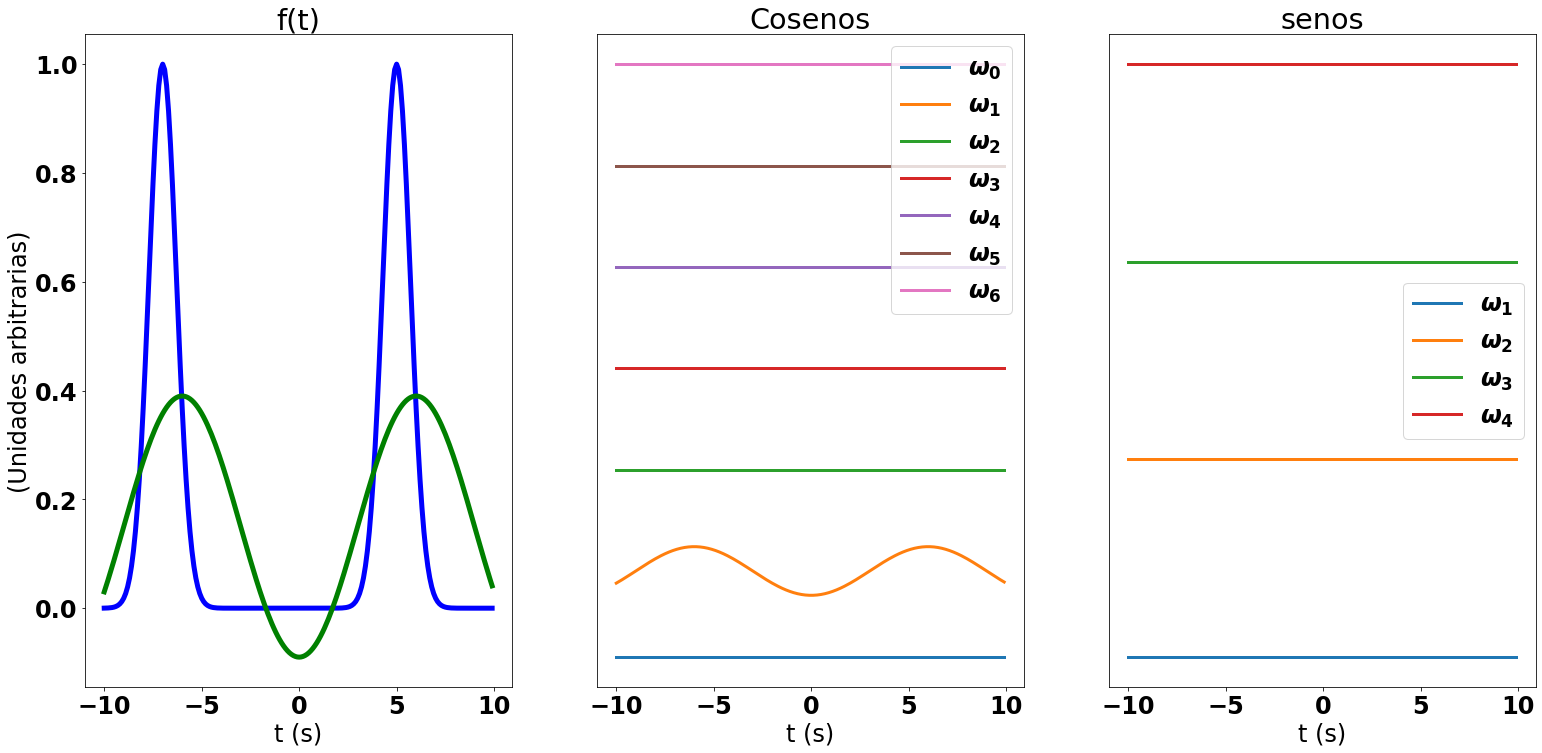

In [ ]:
# PARÁMETROS
T = 12. #periodo
t = np.arange(-10,10,0.1) # rango de visualización
f = np.exp(-(t-5)**2) + np.exp(-(t-5-T)**2) + np.exp(-(t-5+T)**2) # función de prueba

# Pesos (coeficientes) de las funciones ortonormales
# cosenos
a0 = 0.15
a1 = -0.24
a2 = 0
a3 = 0
a4 = -0.0
a5 = 0.0
a6 = -0.0

# senos
b1 = 0
b2 = -0
b3 = 0
b4 = -0.0

##################

# Funciones coseno
f0 = a0*np.ones(t.size)
f1 = a1*np.cos(1*2*np.pi*t/T)
f2 = a2*np.cos(2*2*np.pi*t/T)
f3 = a3*np.cos(3*2*np.pi*t/T)
f4 = a4*np.cos(4*2*np.pi*t/T)
f5 = a5*np.cos(5*2*np.pi*t/T)
f6 = a6*np.cos(6*2*np.pi*t/T)

# Funciones seno
fs1 = b1*np.sin(1*2*np.pi*t/T)
fs2 = b2*np.sin(2*2*np.pi*t/T)
fs3 = b3*np.sin(3*2*np.pi*t/T)
fs4 = b4*np.sin(4*2*np.pi*t/T)

# Combinación lineal de las funciones seno y coseno
F = f0 + f1 + f2 +f3 + f4 + f5 + f6 + fs1 + fs2 + fs3 +fs4

# Graficación
fig1 = plt.figure(1)
plt.subplot(1,3,1)
plt.plot(t,f,color='blue', linewidth=5)
plt.plot(t,F,color='green',lw=5)
plt.title('f(t)'), plt.xlabel('t (s)'), plt.ylabel('(Unidades arbitrarias)')

ax = plt.subplot(1,3,2)
ax.plot(t,f0,label='$\omega_0$', linewidth=3)
ax.plot(t,f1 + 1,label='$\omega_1$', linewidth=3)
ax.plot(t,f2 + 2,label='$\omega_2$', linewidth=3)
ax.plot(t,f3 + 3,label='$\omega_3$', linewidth=3)
ax.plot(t,f4 + 4,label='$\omega_4$', linewidth=3)
ax.plot(t,f5 + 5,label='$\omega_5$', linewidth=3)
ax.plot(t,f6 + 6,label='$\omega_6$', linewidth=3)
ax.legend()
plt.title('Cosenos')
plt.xlabel('t (s)')

frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)

ax = plt.subplot(1,3,3)
ax.plot(t,fs1 + 1,label='$\omega_1$', linewidth=3)
ax.plot(t,fs2 + 2,label='$\omega_2$', linewidth=3)
ax.plot(t,fs3 + 3,label='$\omega_3$', linewidth=3)
ax.plot(t,fs4 + 4,label='$\omega_4$', linewidth=3)
ax.legend()
plt.title('senos')
plt.xlabel('t (s)')


frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)

plt.show()


$\textbf{FIGURA 2}$. contribución de cada función de la base a la combinación lineal (sumatoria), en proporción a sus pesos, para representar la función $f(t)$. (Izquierda) Representación de la sumatoria en verde y de la función $f(t)$ en azul, (centro) contribución de las primeras funciones coseno y el término constante, (Derecha) contribución de algunos senos.

____

Si realizaron el intento de obtener los pesos correctos debieron notar que es un trabajo complicado. No obstante, usando las condiciones de ortonormalidad de la base se pueden determinar expresiones para hallar dichos pesos:
$$a_0 = \frac{1}{T} \int_{-T/2}^{T/2} f(t) dt$$
$$a_n = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \cos\Big(\frac{2n\pi t}{T} \Big) dt$$
$$b_n = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin\Big(\frac{2n\pi t}{T} \Big) dt$$

Nota: tenga presente que en principio para representar cualquier función necesitaría un número infinito de funciones coseno y seno. Por lo que al no poder usar las infinitas funciones de la base lo que tendrá será una función aproximada a la real.

A continuación podrá usar las siguientes líneas para determinar los pesos correctos.

In [ ]:
# PARÁMETROS
dt = 0.1 # muestreo
n = 1 # índice del peso que desea averiguar. Cambiar para obtener el respectivo coef. al ejecutar la próxima línea


################################
t2 = np.arange(-T/2,T/2,dt)
f2 = np.exp(-(t2-5)**2) + np.exp(-(t2-5-T)**2) + np.exp(-(t2-5+T)**2)

# a0
peso = (1/T)*np.sum(f2)*dt
print('a0 = %.2f' % peso)

#an
kernel = np.cos(n*2*np.pi*t2/T)
rrr = f2*kernel
peso = 2/T*np.sum(rrr)*dt
print('an = %.2f para n = %d' % (peso,n))

#bn
kernel = np.sin(n*2*np.pi*t2/T)
rrr = f2*kernel
peso = 2/T*np.sum(rrr)*dt
print('bn = %.2f para n = %d' % (peso,n))
#plt.figure(2)
#plt.plot(t2,kernel,t2,f2,t2,rrr)


# Valores recomendados (solución)
#a0 = 0.15 a1 = -0.24 a2 = 0.11 a3 = 0.0 a4 = -0.05 a5 = 0.05 a6 = -0.03 b1 = 0.14 b2 = -0.19 b3 = 0.16 b4 = -0.09

a0 = 0.15
an = -0.24 para n = 1
bn = 0.14 para n = 1


***EJERCICIO***: una vez haya determinado los coeficientes correctos úselos para graficar la serie de Fourier.

## Serie de Fourier con funciones complejas y transformada de Fourier



En un caso más general la función la puedo representar con una serie de funciones complejas como:


$$f(t) = \sum_{n=-\infty}^{\infty} c_n \exp(-i\omega_n t) $$
con pesos complejos
$$c_n = \frac{1}{T} \int_{-T/2}^{T/2} f(t) \exp(i\omega_n t) dt$$

A continuación usaremos la serie compleja para representar la función:

$$ f(t) = \sum_{n=-\infty}^{\infty} \exp(-(t-5-nT)^2) $$

Graficaremos simultaneamente esta función con dos periodos distintos $T$ y $T_2$. Observaremos en el espacio de las frecuencias $w_n$ la distancia entre los pesos $c_n$ necesarios para representar la función $f(t)$. A medida que aumente el periodo $T_2$ note como varía esta distancia y piense que pasa cuando el periodo es infinito.

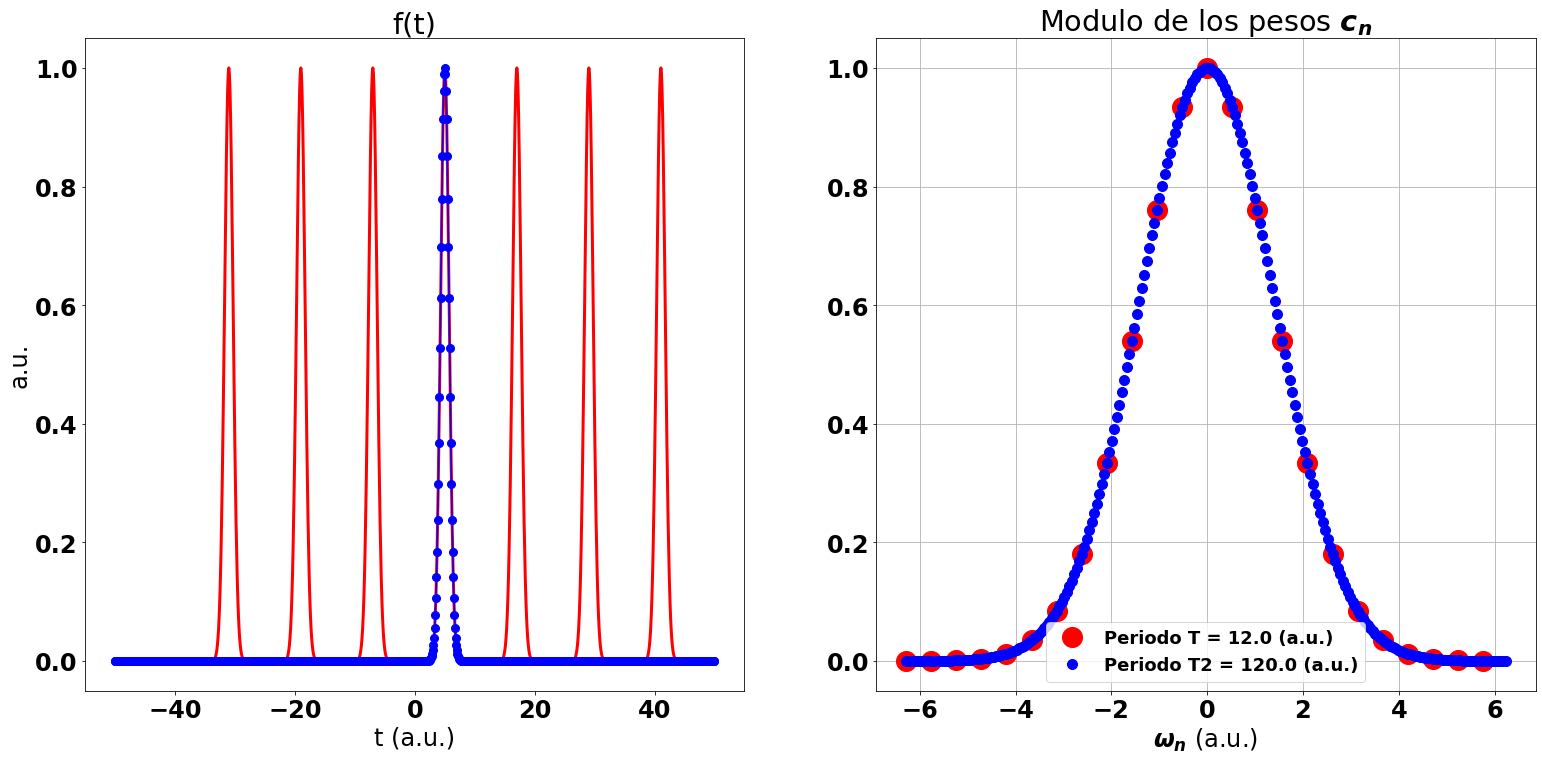

In [ ]:
dt = 0.1 #muestreo
T = 12. #periodo inicial
T2 = 120. #periodo final #### Modificar este parámetro con valroes igual a T o superior. Esto con el fin de que la gráfica salga bien.


###################################
font = {'weight' : 'bold', 'size'   : 24}
matplotlib.rc('font', **font)

t2 = np.arange(-50,50,dt) # rango de observación
f2 = np.exp(-(t2-5)**2) + np.exp(-(t2-5-T)**2) + np.exp(-(t2-5+T)**2) + np.exp(-(t2-5-2*T)**2) + np.exp(-(t2-5+2*T)**2) \
 + np.exp(-(t2-5-3*T)**2) + np.exp(-(t2-5+3*T)**2) # Combinación lineal de la función compleja

# Gráfica
ax1 = plt.subplot(1,2,1)
ax1.plot(t2,f2,color='r', linewidth=3)
plt.title('f(t)')
plt.xlabel('t (a.u.)')
plt.ylabel('a.u.')


# Para facilitar la visualización de las componentes, se restringe la función a un tamaño que iguale la energía
# de la función con mayor periodo
#t2 = np.arange(-T/2,T/2,dt)
#f2 = np.exp(-(t2-5)**2) + np.exp(-(t2-5-T)**2) + np.exp(-(t2-5+T)**2)

# Coeficientes cn
cont = 0
tam = int(2*T)
C = np.zeros((1,tam))
for n in range(int(-tam/2),int(tam/2)):
    kernel = np.exp(1j*n*2*np.pi*t2/T)
    rrr = f2*kernel
    cn = 1/T*np.sum(rrr)*dt
    C[0,cont] = abs(cn)
    cont = cont + 1
C = C/np.max(C) #Coeficientes normalizados

# Gráfica
ax2 = plt.subplot(1,2,2)
coef = 2*np.pi/T*np.arange(int(-tam/2),int(tam/2))
#ax2.plot(coef,C[0,:],marker='|', color='r', ls='',markersize=18,mew=5,label='fun. 1')
ax2.plot(coef,C[0,:],marker='o', color='r', ls='',markersize=20,label='Periodo T = %.1f (a.u.)' % T)
plt.title('Modulo de los pesos $c_n$')
plt.xlabel('$\omega_n$ (a.u.)')


# FUnción con el periodo T2
t3 = np.arange(-50,50,dt)
f2 = np.exp(-(t3-5)**2) + np.exp(-(t3-5-T2)**2) + np.exp(-(t3-5+T2)**2) + np.exp(-(t3-5-2*T2)**2) + np.exp(-(t3-5+2*T2)**2) \
+ np.exp(-(t3-5-3*T2)**2) + np.exp(-(t3-5+3*T2)**2)

# Gráfica
ax1.plot(t3,f2,color='blue',marker='o',markersize=8)

#t3 = np.arange(-T2/2,T2/2,dt)
#f2 = np.exp(-(t3-5)**2) + np.exp(-(t3-5-T2)**2) + np.exp(-(t3-5+T2)**2)

# Coeficientes cn función periodo T2
cont = 0
tam = int(2*T2)
C = np.zeros((1,tam))
for n in range(int(-tam/2),int(tam/2)):
    kernel = np.exp(1j*n*2*np.pi*t3/T2)
    rrr = f2*kernel
    cn = 1/T*np.sum(rrr)*dt
    C[0,cont] = abs(cn)
    cont = cont + 1
C = C/np.max(C) # Coeficientes normalizados

# Gráfica
coef = 2*np.pi/T2*np.arange(-tam/2,tam/2)
#ax2.plot(coef,C[0,:],marker='_', color='r', ls='',markersize=18,mew=5,label='fun. 2')
ax2.plot(coef,C[0,:],marker='o', color='b', ls='',markersize=10,label='Periodo T2 = %.1f (a.u.)' % T2)
ax2.legend(fontsize = 18)
ax2.grid()
plt.show()

$\textbf{FIGURA 3.}$ Espectro de Fourier de la función $f(t)$. Note que a medida que aumenta el periodo de la función el número de pesos complejos (es decir de funciones exponenciales con argumento imaginario) necesarios para representar la función también aumenta. Cuando el periodo tiende a infinito los pesos necesarios se vuelven un contino.

____

A medida que el periodo $T$ aumenta la separación entre las frecuencias $\omega_n$ de las funciones que componen la sumatoria, y que llamaremos espectro de frecuencias, disminuye de forma tal que cuando el periodo tiende a infinito la sumatoria con pesos $c_n$ se convierte en una integral con coeficiente continuo $F(\omega)$ llamada "Integral de Fourier":
$$f(t) = \int_{-\infty}^{\infty} F(\omega) \exp(i\omega t) \frac{d\omega}{2\pi}$$

y los pesos serán ahora una función continua llamada "transformada de Fourier"
$$F(\omega) = \int_{-\infty}^{\infty} f(t) \exp(-i\omega t) dt$$

## Transformada de Fourier Discreta (DFT) y transformada rápida de Fourier (fft)

La integral de Fourier y la transformada de Fourier son funciones continuas. Sin embargo, cuando se pretende realizar computacionalmente una transformada o se usan sistemas digitales, el espacio continuo se convierte en un espacio discreto. Hablaremos entonces de transformada de Fourier discreta (DFT), y tendremos en cuenta parámetros como el muestreo, los puntos muestreados (tamaño del arreglo), y el teorema de Nyquist-Shannon.

Para entender esto mejor miremos el siguiente ejemplo donde una función continua debe ser muestreada para poder hacer operaciones digitales. Esto requiere definir una distancia mínima entre puntos, lo que producirá un arreglo de puntos con la información digitalizada de la función continua. Realizada la digitalización podemos realizar la DFT usando el algoritmo de FFT para obtener la transformada de Fourier discretizada (espectro de frecuencias) de la función continua.

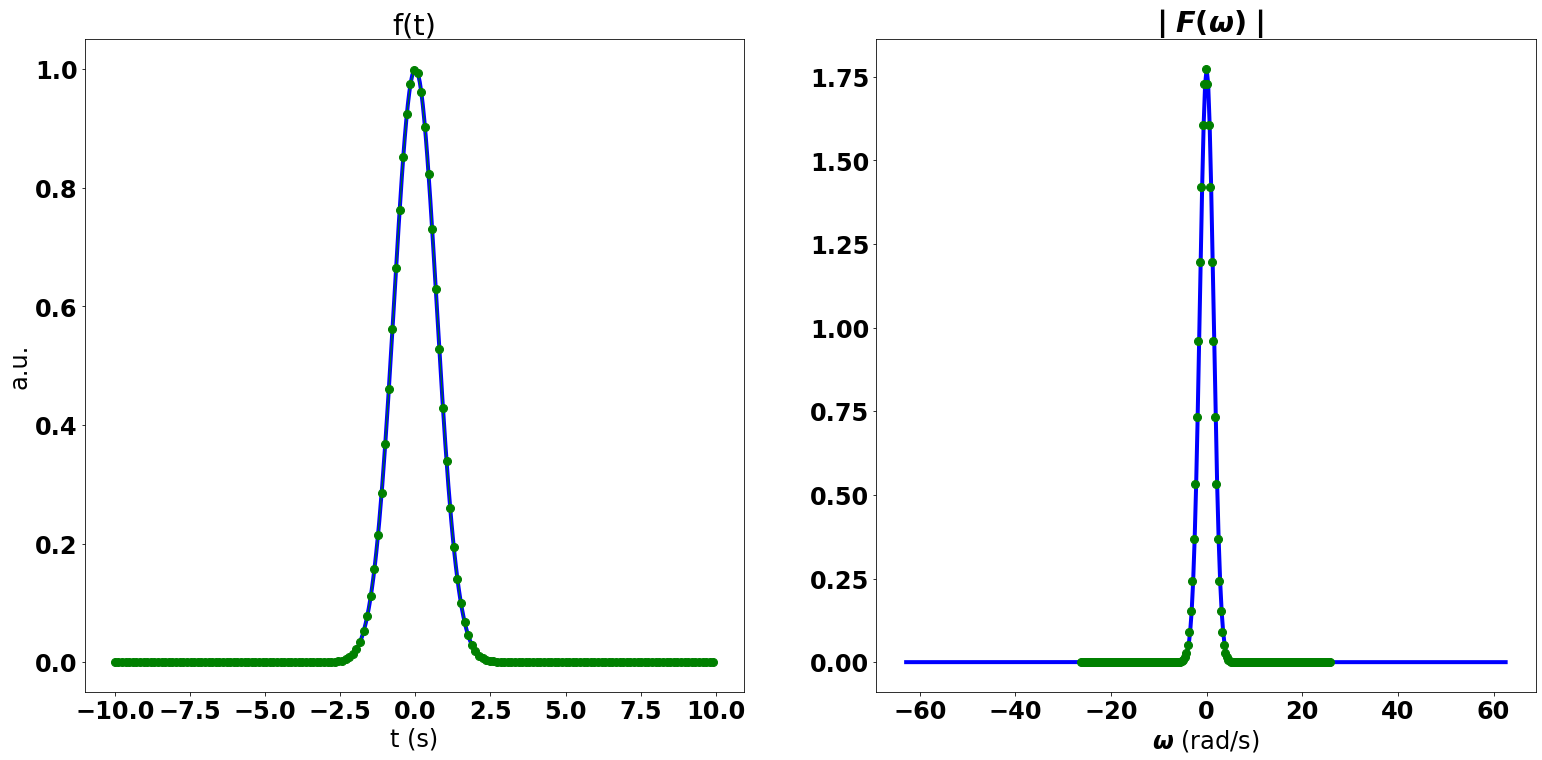

In [ ]:
dt = 0.05 #muestreo fino para simulación de continuo, segundos
dt2 = 0.12 #muestreo, segundos. ##### Modificar para ver el efecto del muestreo en el espacio temporal, valores igual o superiores a dt
max = 10

###
# Nota: al disminuir dt2 el programa incrementa el número de puntos de la matriz de forma automática. Si dt2 aumenta ocurre lo contrario
###


##########################
t = np.arange(-max,max,dt)
ft = np.exp(-(t)**2)
fig3 = plt.figure(3)

ax1 = plt.subplot(1,2,1)
ax1.plot(t,ft,lw=4,color='b')
plt.title('f(t)')
plt.xlabel('t (s)')
plt.ylabel('a.u.')

fw = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft))*dt) # TF usando FFT
w = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size)) # grafica la frecuencia
w = 2*np.pi*np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size)) # grafica la frecuencia angular
ax2 = plt.subplot(1,2,2)
ax2.plot(w,abs(fw),lw=4,color='b')
plt.title('$\mid F(\omega) \mid$')
plt.xlabel('$\omega$ (rad/s)')

del ft,fw
t2 = np.arange(-max,max,dt2)
ft = np.exp(-(t2)**2)
ax1.plot(t2,ft,lw=1,marker='o',markersize=8,color='g')



fw = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft))*dt2)
w2 = np.arange(-1/(2*dt2),1/(2*dt2),1/(dt2*t2.size)) # frecuencia
w2 = 2*np.pi*np.arange(-1/(2*dt2),1/(2*dt2),1/(dt2*t2.size)) # frecuencia angular


ax2.plot(w2,abs(fw),lw=0,marker='o',markersize=8,ls='',color='g')
plt.show()

######################## IMPORTANTE ###############
# Si al ejecutar el programa le sale el siguiente error (por ejemplo al usar dt2 = 0.7)
# ValueError: x and y must have same first dimension, but have shapes (16,) and (15,)
#
# Esto se debe a que por el redondeo al crear el sistema coordenado se crea un punto menos al que crea la FFT.
#
# Para resolverlo simplemente cambie el valor que tenga en dt2 por uno cercano, por ejemplo dt2 = 0.71
###################################################

$\textbf{FIGURA 4. } $Muestreo (puntos verdes) de una función continua (línea azul). Señal temporal (Izquierda) y espectro de frecuencias (derecha) de la señal temporal.
____

Es importante anotar que en el espacio de la señal la separación de los puntos depende del muestreo elegido, mientras que en el espacio del espectro de frecuencias la separación depende del tamaño del espacio de la señal (en este ejemplo el tiempo total de la señal es 20 segundos). Por lo tanto, como en este ejercicio estamos cambiando el muestreo "dt2" y no el rango temporal los puntos en el espacio de la señal cada vez se alejan más, mientras que en el espacio de las frecuencias conservan la distancia pero cubren un rango de frecuencias diferente.

#### Tarea en clase: determinar el mínimo muestreo para resolver la función recta y triángulo graficando el mínimo necesario de puntos sobre la curva respectiva. Realizar la DFT para identificar las componentes frecuenciales

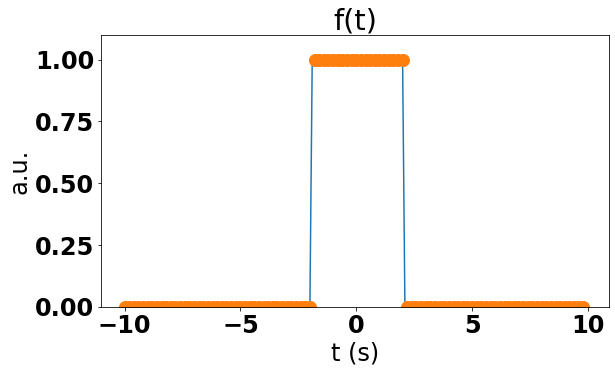

Text(0.5, 0, '$\\omega$ (rad/s)')

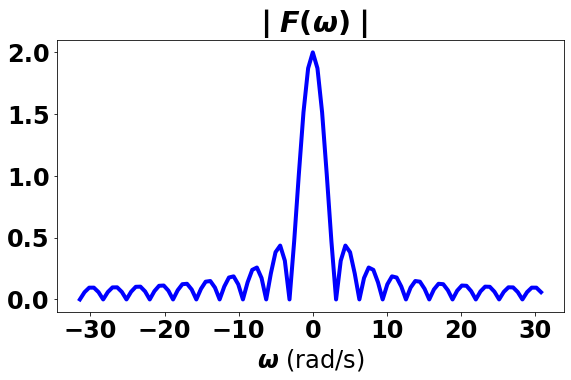

In [ ]:
dt = 0.1 #muestreo fino para simulación de continuo, segundos
dt2 = 0.2 #muestreo, segundos


##################################
t = np.arange(-10,10,dt)
ft = np.zeros(t.size)
for cont in range(len(t)):
    if abs(t[cont]) < 2:
        ft[cont] = 1.
    else:
        ft[cont] = 0.

plt.rcParams['figure.figsize'] = 20, 5 # para modificar el tamaño de la figura
fig3 = plt.figure(3)

ax1 = plt.subplot(1,2,1)
ax1.plot(t,ft)
plt.title('f(t)')
plt.xlabel('t (s)')
plt.ylabel('a.u.')
plt.ylim(0,1.1)

del t,ft

t = np.arange(-10,10,dt2)
ft = np.zeros(t.size)
for cont in range(len(t)):
    if abs(t[cont]) < 2:
        ft[cont] = 1.
    else:
        ft[cont] = 0.

ax1.plot(t,ft,marker='o',markersize=12,ls='')
plt.show()
#######
# COMPLETAR PARA OBTENER EL ESPECTRO DE FRECUENCIAS
#######

fw = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft))*dt) # TF usando FFT
w = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size)) # grafica la frecuencia
w = 2*np.pi*np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size)) # grafica la frecuencia angular
ax2 = plt.subplot(1,2,2)
ax2.plot(w,abs(fw),lw=4,color='b')
plt.title('$\mid F(\omega) \mid$')
plt.xlabel('$\omega$ (rad/s)')

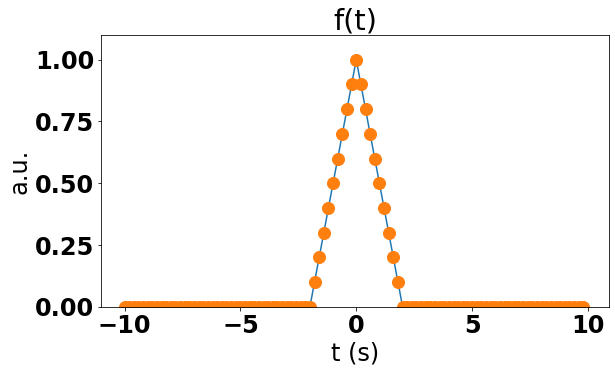

In [ ]:
dt = 0.1 #muestreo fino para simulación de continuo, segundos
dt2 = 0.2 #muestreo, segundos


##################################
t = np.arange(-10,10,dt)
ft = np.zeros(t.size)
for cont in range(len(t)):
    if abs(t[cont]) < 2:
        if(t[cont] <=0): ft[cont] = 1/2*t[cont] + 1
        else: ft[cont] = -1/2*t[cont] + 1
    else:
        ft[cont] = 0.

plt.rcParams['figure.figsize'] = 20, 5 # para modificar el tamaño de la figura
fig3 = plt.figure(3)

ax1 = plt.subplot(1,2,1)
ax1.plot(t,ft)
plt.title('f(t)')
plt.xlabel('t (s)')
plt.ylabel('a.u.')
plt.ylim(0,1.1)

del t,ft

t = np.arange(-10,10,dt2)
ft = np.zeros(t.size)
for cont in range(len(t)):
    if abs(t[cont]) < 2:
        if(t[cont] <=0): ft[cont] = 1/2*t[cont] + 1
        else: ft[cont] = -1/2*t[cont] + 1
    else:
        ft[cont] = 0.

ax1.plot(t,ft,marker='o',markersize=12,ls='')
plt.show()
#######
# COMPLETAR PARA OBTENER EL ESPECTRO DE FRECUENCIAS
#######

### NOTA: diferencia entre frecuencia y frecuencia angular

Hemos definido la FT y la IFT para la frecuencia angular $\omega$,
$$\text{FT:}\quad F(\omega) = \int_{-\infty}^{\infty} f(t) \exp(-i\omega t) dt$$

$$\text{IFT:}\quad f(t) = \int_{-\infty}^{\infty} F(\omega) \exp(i\omega t) \frac{d\omega}{2\pi}$$

Sin embargo, en python la FFT, es decir, la DFT esta definida como:

$$\text{DFT:}\quad A_k = \sum_{m=0}^{n-1} a_m \text{exp}\bigg(-2\pi i \frac{m k}{n}\bigg) \quad k=0,1,2,...,n-1$$

$$\text{DIFT:}\quad a_m = \frac{1}{n} \sum_{k=0}^{n-1} A_k \text{exp}\bigg(2\pi i \frac{m k}{n}\bigg) \quad m=0,1,2,...,n-1$$

La diferencia entre la FT y la DFT es que en la DFT se debe multiplicar la sumatoria por el delta correspondiente, en este caso $\Delta m$, mientras que en la FT esta multiplicación está implícita en la integral. En el caso de la DIFT se multiplica por $\Delta k$.

Entonces, recordando que la frecuencia angular se define en términos de la frecuencia como $\omega = 2\pi\nu$, podemos reescribir la FT y la IFT como:

$$\text{FT:}\quad F(\nu) = \int_{-\infty}^{\infty} f(t) \exp(-i 2\pi\nu t) dt$$

$$\text{IFT:}\quad f(t) = \int_{-\infty}^{\infty} F(\nu) \exp(i 2 \pi\nu t) \text{d}\nu$$

Note que ahora el término $2\pi$ se encuentra en la exponencial como en las transformadas discretas. Por lo tanto, cuando usamos la FFT obtenemos la frecuencia, y debemos multiplicar la coordenada frecuencia por $2\pi$ para obtener la frecuencia angular.

$\textbf{Ejercicio}$: ahora realice el siguiente cambio de variables para encontrar la tercera forma de expresar la transformada de Fourier: $k = \sqrt{ 2\pi} \nu$ y $x = \sqrt{2\pi} t$. El $k$ de este ejercicio es diferente al $k$ de la sumatoria.

### ¡PRECAUCIÓN!, Shift de la fft
La DFT en realidad es hecha usando un algorítmo conocido como FFT. Dicho algoritmo lee la información en un orden distinto esperando que el cero de la gráfica anterior esté desplazado hacia la primera casilla del vector. Esto, en algunas ocasiones puede generar errores por lo que hay que tener precaución y usar un comando que organiza la información ya sea para la visualización o para el procesamiento con la FFT. En el caso de python es la rutina fft.fftshift. Miremos un ejemplo.

Primero que hace la función shift

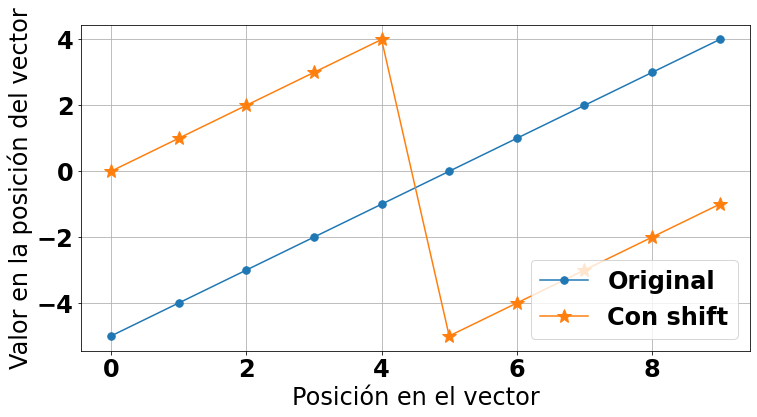

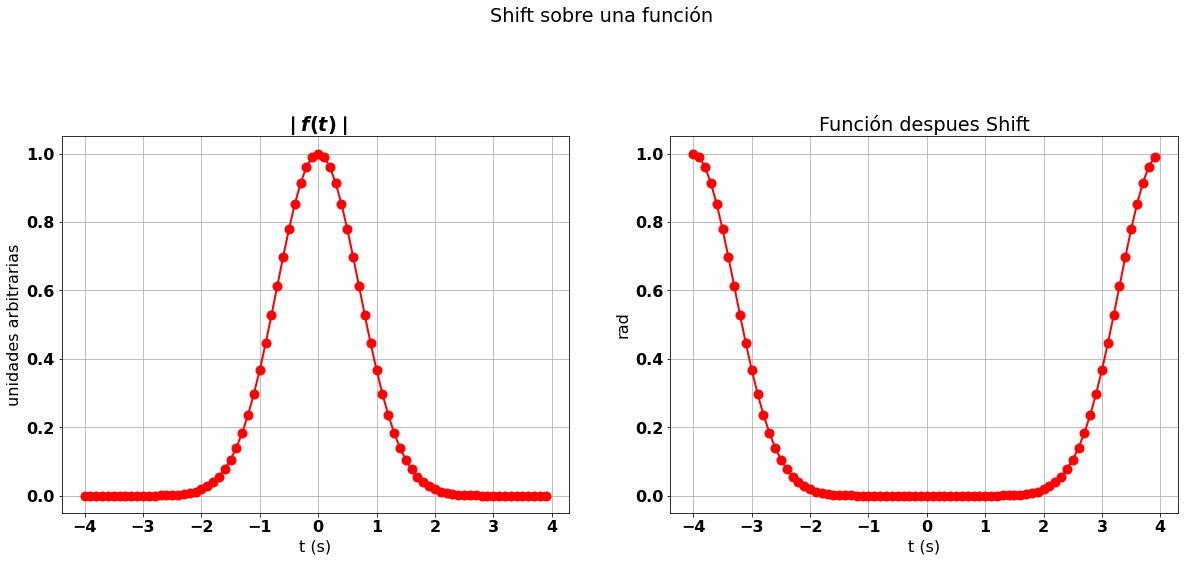

In [ ]:
dt = 0.1 #muestreo fino para simulación de continuo, segundos

A = np.arange(-5,5,1)
B = np.fft.fftshift(A)

plt.figure(figsize=(12,6))
plt.plot(A,marker='.',ms=15,label='Original')
plt.plot(B,marker='*',ms=15,label='Con shift')
plt.grid()
plt.xlabel('Posición en el vector')
plt.ylabel('Valor en la posición del vector')
plt.legend(loc=4)
plt.show()

font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20,18))
fig.suptitle('Shift sobre una función')
fig.subplots_adjust(hspace=.6)
t = np.arange(-4,4,dt) # Rango temporal
ft = np.exp(-(t)**2)*np.exp(1j*2.*np.pi*t) # Función señal

# Gráfica amplitud de la función señal
ax1 = plt.subplot(2,2,1)
ax1.plot(t,abs(ft),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$\mid f(t) \mid$')
plt.xlabel('t (s)')
plt.ylabel('unidades arbitrarias')
plt.grid()

# Gráfica fase de la función señal
plt.subplot(2,2,2)
plt.plot(t,abs(np.fft.fftshift(ft)),marker='.',color='red',linewidth=2,markersize=18)
plt.title('Función despues Shift')
plt.xlabel('t (s)')
plt.ylabel('rad')
#plt.gca().invert_xaxis()
plt.grid()



$\textbf{FIGURA 5.}$ Efecto de la función fftshift($\cdot$) sobre un vector.

Ahora miremos lo que puede hacer en la FFT

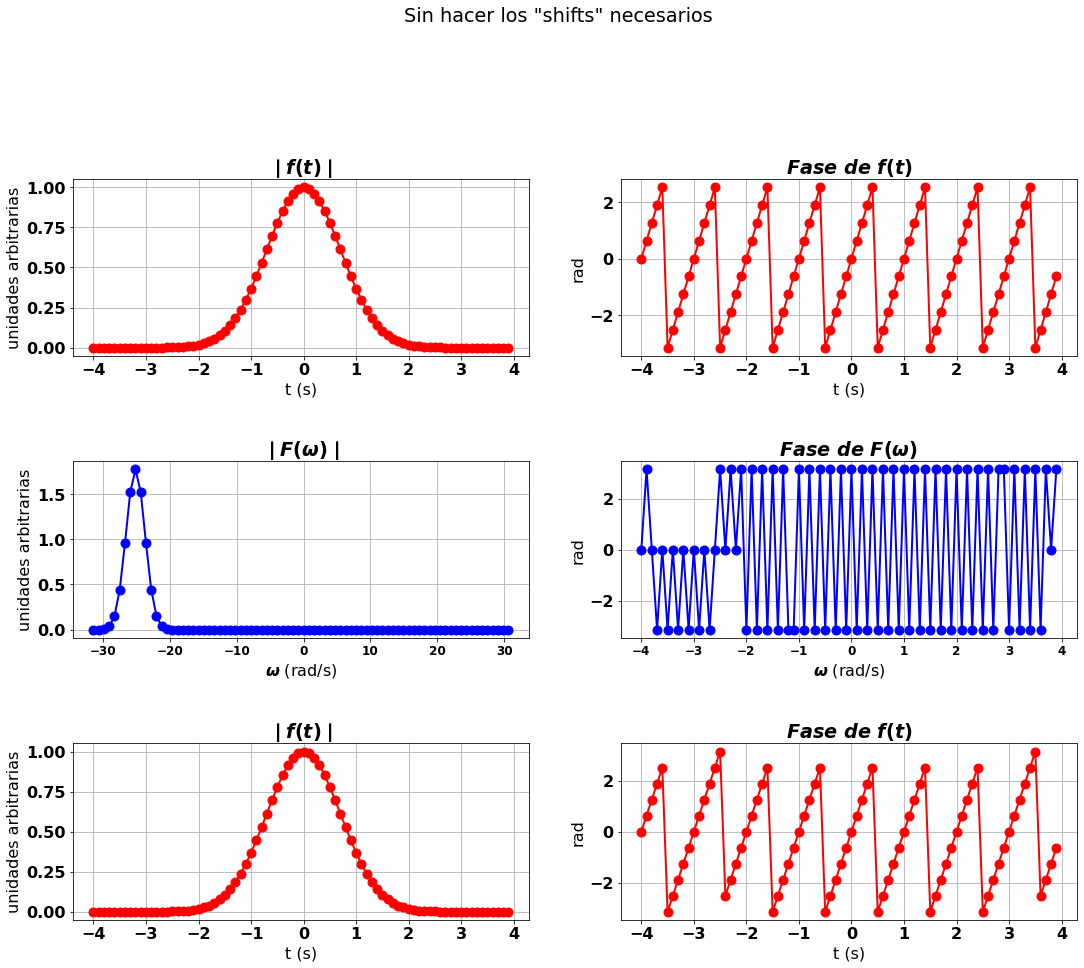

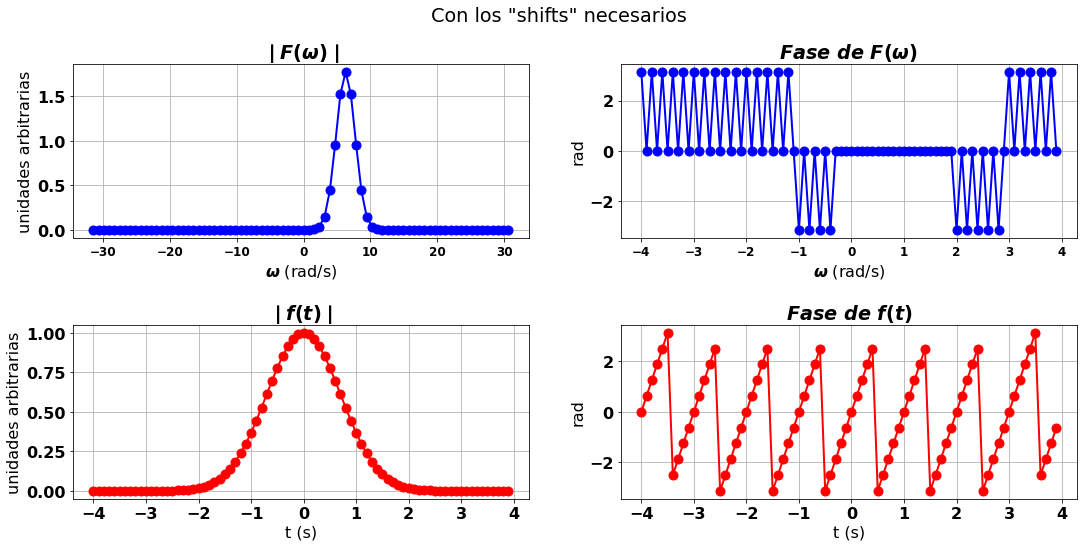

In [ ]:
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(18,24))
fig.suptitle('Sin hacer los "shifts" necesarios')
fig.subplots_adjust(hspace=.6)
t = np.arange(-4,4,dt) # Rango temporal
ft = np.exp(-(t)**2)*np.exp(1j*2.*np.pi*t) # Función señal

# Gráfica amplitud de la función señal
ax1 = plt.subplot(5,2,1)
ax1.plot(t,abs(ft),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$\mid f(t) \mid$')
plt.xlabel('t (s)')
plt.ylabel('unidades arbitrarias')
plt.grid()

# Gráfica fase de la función señal
ft_ang = np.angle(ft) #fase
plt.subplot(5,2,2)
plt.plot(t,ft_ang,marker='.',color='red',linewidth=2,markersize=18)
plt.title('$Fase \ de \ f(t)$')
plt.xlabel('t (s)')
plt.ylabel('rad')
plt.grid()

fw = np.fft.fft(ft)*dt
w = 2*np.pi*np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))
ax2 = plt.subplot(5,2,3)
ax2.plot(w,abs(fw),marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$\mid F(\omega) \mid$')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('unidades arbitrarias')
plt.xticks(fontsize=12)
plt.grid()

fw_ang = np.angle(fw)
plt.subplot(5,2,4)
plt.plot(t,fw_ang,marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$Fase \ de \ F(\omega) $')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('rad')
plt.xticks(fontsize=12)
plt.grid()

ft2 = np.fft.ifft(fw)*(1/dt)
plt.subplot(5,2,5)
plt.plot(t,abs(ft2),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$\mid f(t) \mid$')
plt.xlabel('t (s)')
plt.ylabel('unidades arbitrarias')
plt.grid()


plt.subplot(5,2,6)
plt.plot(t,np.angle(ft2),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$Fase \ de \ f(t)$')
plt.xlabel('t (s)')
plt.ylabel('rad')
plt.grid()


fig = plt.figure(figsize=(18,8))
fig.suptitle('Con los "shifts" necesarios')
fig.subplots_adjust(hspace=.5)


fw = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
w = 2*np.pi*np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

ax2 = plt.subplot(2,2,1)
ax2.plot(w,abs(fw),marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$\mid F(\omega) \mid$')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('unidades arbitrarias')
plt.xticks(fontsize=12)
plt.grid()

fw_ang = np.angle(fw)
plt.subplot(2,2,2)
plt.plot(t,fw_ang,marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$Fase \ de \ F(\omega) $')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('rad')
plt.xticks(fontsize=12)
plt.grid()

ft2 = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(fw)))*(1/dt)
plt.subplot(2,2,3)
plt.plot(t,abs(ft2),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$\mid f(t) \mid$')
plt.xlabel('t (s)')
plt.ylabel('unidades arbitrarias')
plt.grid()


plt.subplot(2,2,4)
plt.plot(t,np.angle(ft2),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$Fase \ de \ f(t)$')
plt.xlabel('t (s)')
plt.ylabel('rad')
plt.grid()

$\textbf{FIGURA 6.}$ En esta figura se toma una señal con amplitud y fase diferente de cero, se realiza la DFT y luego se realiza la DFT inversa. Esto se realiza para el caso en que no se usa la función fftshift, y para el caso en que si. Note la direfencia que aparece en el espectro de frecuencias. No tener precaución con esto puede generar errores cuando se realizan operaciones en el espectro de frecuencias. La primera fila corresponde a la función original, la segunda y cuarta a la TF, y la tercera y quinta a la TF inversa.

Ahora miremos como sería en dos dimensiones:

<img src="https://docs.google.com/uc?export=download&id=1jzKJCe_IZXfbVmUEN2WEeELgAivRfba3" alt="2dshift" title="2dfftshift" width="500px"/>



In [ ]:
from IPython.display import display

### ¡PRECAUCIÓN!, Teorema del muestreo de Shannon-Nyquist (S-N)
Debido a que solo es posible reconstruir un número discreto de los valores espectrales que forman una función (espacio de Fourier o transformada de Fourier), el teorema nos indica hasta que frecuencia debemos tener información con el fin de recuperar correctamente la función. Las relaciones principales entre los muestreos en ambos espacios es:
$$\Delta f = \frac{1}{N \Delta t}$$

$$\Delta t = \frac{1}{2 f_{max}}$$

$$f_{max} = \frac{N \Delta f}{2}$$

<img src="https://docs.google.com/uc?export=download&id=1ik5eXWSwX97pOHkObBg8jLfGxefRdrcc" alt="Shanon-Nyquist" title="Shanon-Nyquist" width="500px"/>

$\textbf{FIGURA 7}$. (Superior) relación entre el menor periodo $T_{min}$ o máxima frecuencia $f_{max}$ con el muestreo $\Delta t$. (Inferior) mínima frecuencia $\Delta f$ resoluble cuando la resolución es $\Delta t$ y el número de posiciones en el arreglo es $N$.

____

NOTA: En este contexto para la frecuencia se usa $f$ y $\nu$.

$\Delta f = \Delta \nu :$ Frecuencia mínima o muestreo en el espacio de las frecuencias.

$\Delta t :$ Tiémpo mínimo o muestreo en el espacio temporal.

$1/\Delta t :$ Frecuencia de muestreo en el espacio temporal.


El teorema nos dice que el muestreo debe ser igual o menor a la siguiente relación:
$$\Delta t \le \frac{1}{2 f_{max}}$$

También podemos decir que para tener un muestreo igual o mejor a $\Delta t$, con el fin de representar correctamente la señal, es necesario tener información del espectro de frecuencias al menos hasta la frecuencia $f_{max}$.

Como ejemplo hacer las siguientes pruebas para ver como influyen las variables:

1. Variar el muestreo dt2 y dejar fijo el rango del espacio temporal M. Repetir lo anterior pero ahora aumentar el rango de observación de las frecuencias. Al variar dt2 se aumenta la frecuencia máxima, pero el programa también aumenta el número de datos en el vector por lo que el muestreo de las frecuencias se mantiene constante. N = M*dt2.
2. Variar el rango temporal M dejando el resto fijo. Esto varía el muestreo en las frecuencias al aumentar el tamaño del vector N sin modificar el muestreo temporal dt2.
3. Variar el muestreo temporal dt2 dejando el tamaño del vector N fijo es equivalente al punto 2.

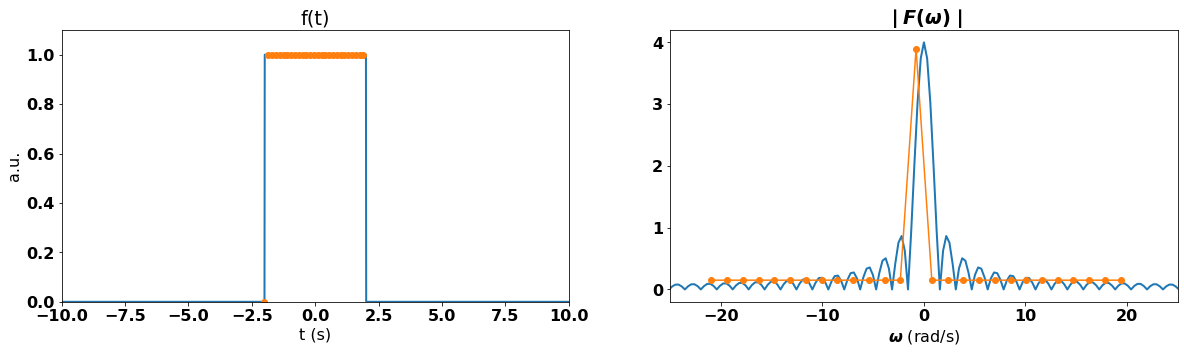

In [ ]:
dt = 0.01 #muestreo fino para simulación de continuo, segundos
dt2 = 0.15 #muestreo, segundos
M = 2 # rango espacio temporal a variar
M2 = 25 # rango de observación frecuencias


##################################
t = np.arange(-10,10,dt)
ft = np.zeros(t.size)
for cont in range(len(t)):
    if abs(t[cont]) < 2:
        ft[cont] = 1.
    else:
        ft[cont] = 0.

plt.rcParams['figure.figsize'] = 20, 5 # para modificar el tamaño de la figura
fig3 = plt.figure(3)

ax1 = plt.subplot(1,2,1)
ax1.plot(t,ft,lw=2)
plt.title('f(t)')
plt.xlabel('t (s)')
plt.ylabel('a.u.')
plt.ylim(0,1.1)
plt.xlim(-10,10)


fw = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft))*dt) # TF usando FFT
#w = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size)) # grafica la frecuencia
w = 2*np.pi*np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size)) # grafica la frecuencia angular
ax2 = plt.subplot(1,2,2)
ax2.plot(w,abs(fw),lw=2)
plt.xlim([-M2,M2])
plt.title('$\mid F(\omega) \mid$')
plt.xlabel('$\omega$ (rad/s)')

del t,ft
t = np.arange(-M,M,dt2)
ft = np.zeros(t.size)
for cont in range(len(t)):
    if abs(t[cont]) < 2:
        ft[cont] = 1.
    else:
        ft[cont] = 0.

ax1.plot(t,ft,marker='o',markersize=6,ls='')

fw = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft))*dt2) # TF usando FFT
#w = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size)) # grafica la frecuencia
w = 2*np.pi*np.arange(-1/(2*dt2),1/(2*dt2),1/(dt2*t.size)) # grafica la frecuencia angular
ax2.plot(w,abs(fw),marker='o',markersize=6)
plt.show()




$\textbf{FIGURA 8}$. Función Rect y la amplitud de su transformada de Fourier.
_____

Miremos un ejemplo en el que no se tiene información de todas las frecuencias exigidas por el teorema de S-N:

In [ ]:
dt = 0.05
fmax = 1/(2*dt)
print('Para tener un muestreo de la señal igual a %.2f s es necesario tener información hasta la frecuencia %.2f 1/s' %(dt,fmax))

Para tener un muestreo de la señal igual a 0.05 s es necesario tener información hasta la frecuencia 10.00 1/s


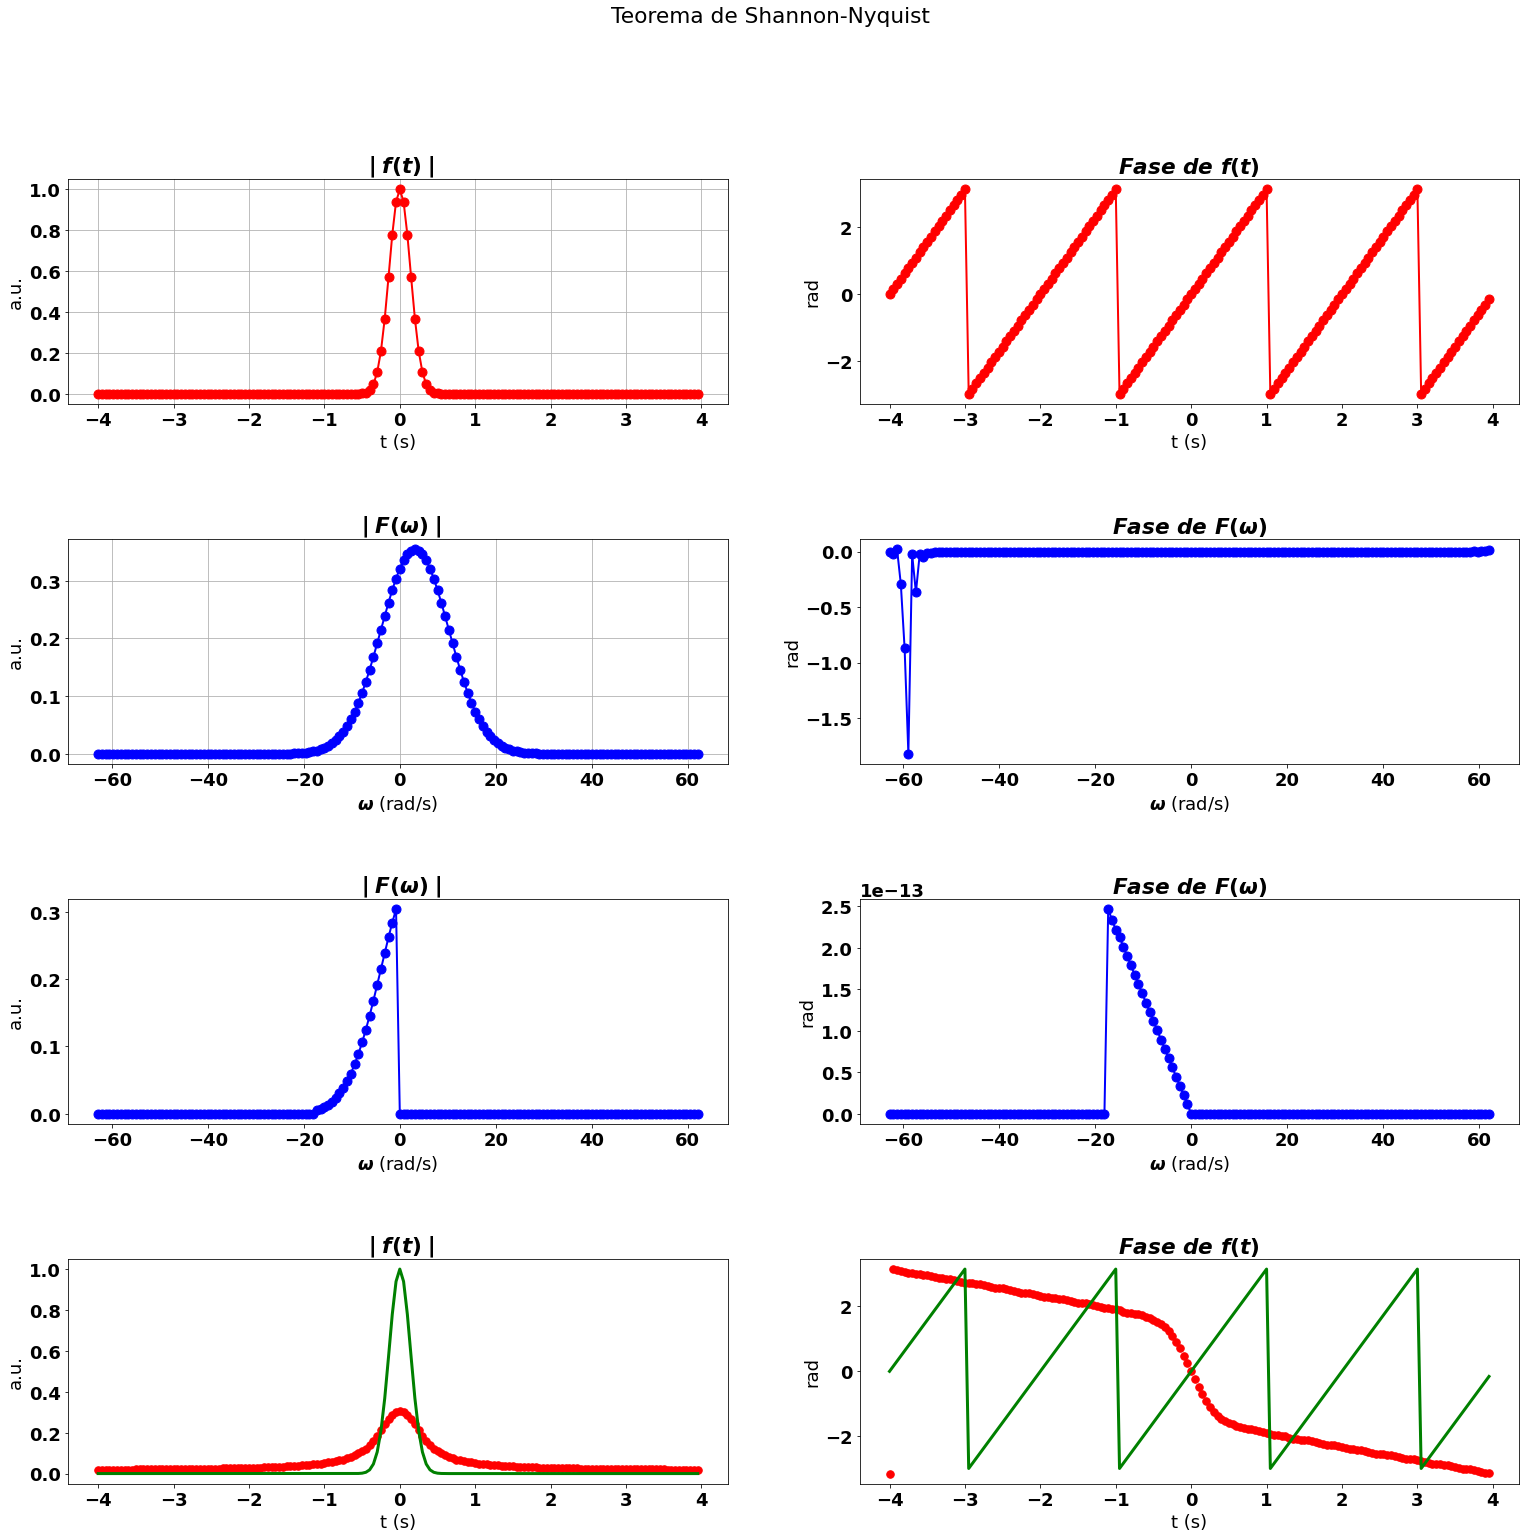

In [ ]:
font = {'weight' : 'bold', 'size'   : 18}
matplotlib.rc('font', **font)

dt = 0.05
fig = plt.figure(figsize=(26,24))
fig.suptitle('Teorema de Shannon-Nyquist')
fig.subplots_adjust(hspace=.6)
t = np.arange(-4,4,dt)
ft = np.exp(-(5*t)**2)*np.exp(1j*np.pi*t)
plt.subplot(4,2,1)
plt.plot(t,abs(ft),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$\mid f(t) \mid$')
plt.xlabel('t (s)')
plt.ylabel('a.u.')
plt.grid()
#plt.xlim(-1,1)

ft_ang = np.angle(ft)
plt.subplot(4,2,2)
plt.plot(t,ft_ang,marker='.',color='red',linewidth=2,markersize=18)
plt.title('$Fase \ de \ f(t)$')
plt.xlabel('t (s)')
plt.ylabel('rad')
#plt.xlim(-1,1)

fw = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
w = 2*np.pi*np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))
ax2 = plt.subplot(4,2,3)
ax2.plot(w,abs(fw),marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$\mid F(\omega) \mid$')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('a.u.')
plt.grid()

fw_ang = np.angle(fw)
plt.subplot(4,2,4)
plt.plot(w,fw_ang,marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$Fase \ de \ F(\omega) $')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('rad')

##########################
# filtrado manual
fw[0 : int(4*fw.size/11)] = 0
fw[int(4*fw.size/8) : fw.size] = 0
#----------------
################################

plt.subplot(4,2,5)
plt.plot(w,abs(fw),marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$\mid F(\omega) \mid$')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('a.u.')

fw_ang = np.angle(fw)
plt.subplot(4,2,6)
plt.plot(w,fw_ang,marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$Fase \ de \ F(\omega) $')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('rad')

ft2 = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(fw)))*(1/dt)
plt.subplot(4,2,7)
plt.plot(t,abs(ft2),marker='.',color='red',ls='',markersize=15)
plt.plot(t,abs(ft),color='green',linewidth=3)
plt.title('$\mid f(t) \mid$')
plt.xlabel('t (s)')
plt.ylabel('a.u.')
#plt.xlim(-1,1)


plt.subplot(4,2,8)
plt.plot(t,np.angle(ft2),marker='.',color='red',ls='',markersize=15)
plt.plot(t,ft_ang,color='green',linewidth=3)
plt.title('$Fase \ de \ f(t)$')
plt.xlabel('t (s)')
plt.ylabel('rad')



plt.show()

$\textbf{FIGURA 9.}$ Teorema de S-N. Note que cuando se pierde información del espectro de una señal, la señal recuperada es distinta a la original.

____

En este último ejemplo miraremos como afecta la condición del teorema en la recuperación de las frecuencias: se tiene una señal correspondiente a una gaussiana y se toma como frecuencia crítica de esta señal el valor 1.5

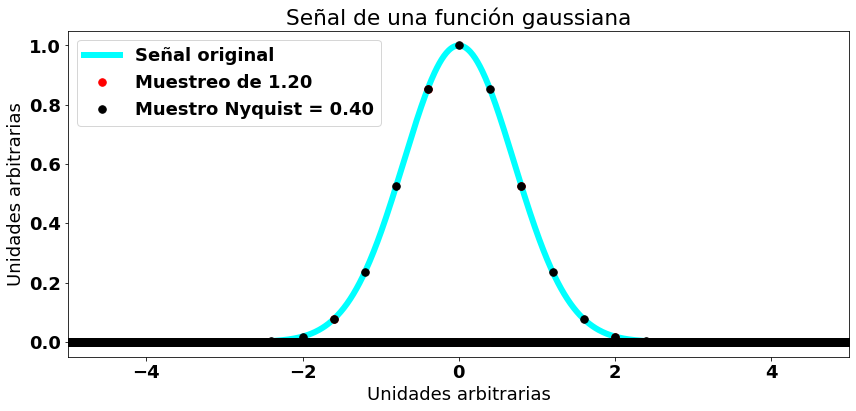

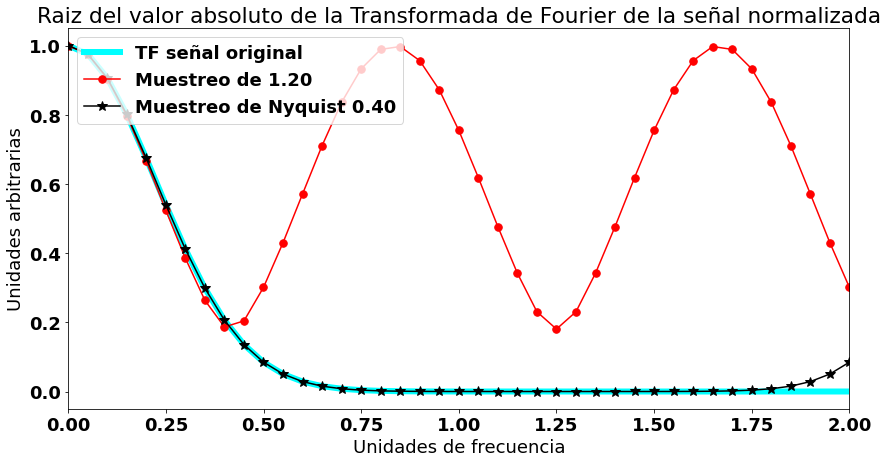

In [ ]:
# Función gaussiana
dx = 0.01
max = 10
x = np.arange(-max,max,dx)
gauss = np.exp(-x**2)

# Función muestreada
##############################
dxs = 1.2 # Valor a modificar
##############################
gauss_s = np.zeros(gauss.size)
for n2 in np.arange(0,gauss.size,int(dxs/dx)):
    gauss_s[n2] = gauss[n2]

# Función Ns
dxNs = 1/(2.*1.25) # se toma 1.5 como la frecuencia crítica de la TF de la gaussiana
gauss_Ns = np.zeros(gauss.size)
for n2 in np.arange(0,gauss.size,int(dxNs/dx)):
    gauss_Ns[n2] = gauss[n2]


plt.figure(figsize=(14,6))
plt.plot(x,gauss,lw=6,label='Señal original',color='cyan')
plt.plot(x,gauss_s,lw=0,marker='.',ms=15,color='red',label='Muestreo de %.2f' % dxs)
plt.plot(x,gauss_Ns,lw=0,marker='.',ms=15,color='black',label='Muestro Nyquist = %.2f' % dxNs)
plt.title('Señal de una función gaussiana')
plt.xlabel('Unidades arbitrarias')
plt.ylabel('Unidades arbitrarias')
plt.xlim(-5.,5.)
plt.legend(loc=2)
# TF
gaussft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(gauss)))*dx
v = np.arange(-1/(2*dx),1/(2*dx),1/(dx*gauss.size)) # Espacio coordenado de frecuencias

gaussft_s = np.fft.fftshift(np.fft.fft(np.fft.fftshift(gauss_s)))*dx

gaussft_Ns = np.fft.fftshift(np.fft.fft(np.fft.fftshift(gauss_Ns)))*dx

plt.figure(figsize=(14,7))
plt.plot(v,abs(gaussft)/np.max(abs(gaussft)),lw=6,label = 'TF señal original',color='cyan')
plt.plot(v,abs(gaussft_s)/np.max(abs(gaussft_s)),color='red',marker='.',ms=15, label='Muestreo de %.2f' % dxs)
plt.plot(v,abs(gaussft_Ns)/np.max(abs(gaussft_Ns)),color='black',marker='*',ms=10, label='Muestreo de Nyquist %.2f' % dxNs)
plt.xlabel('Unidades de frecuencia')
plt.ylabel('Unidades arbitrarias')
plt.xlim(0,2.0)
plt.title('Raiz del valor absoluto de la Transformada de Fourier de la señal normalizada')
plt.legend(loc=2)
plt.show()

$\textbf{FIGURA 10}$. Teorema de Nyquist-Shannon.
____

### ¡PRECAUCIÓN!, Teorema de Parseval
El teorema de Parseval nos indica que la energía en el plano original y en el plano de Fourier es la misma. Para cumplir este teorema cuando se haga una FFT se debe multiplicar por el muestreo dt, y cuando se haga una IFFT por el inverso. Veamos un ejemplo en el que se hace la DFT a una señal multiplicando por el factor apropiado, pero no multiplicamos por el factor apropiado en la DFT inversa cuando pretendemos recuperar la señal.

Factor usado = 20.00
Factor correcto = 20.00
Energía en plano de entrada = 1.253314
Energía en plano Fourier = 1.253314
Energía en plano de salida  = 1.253314


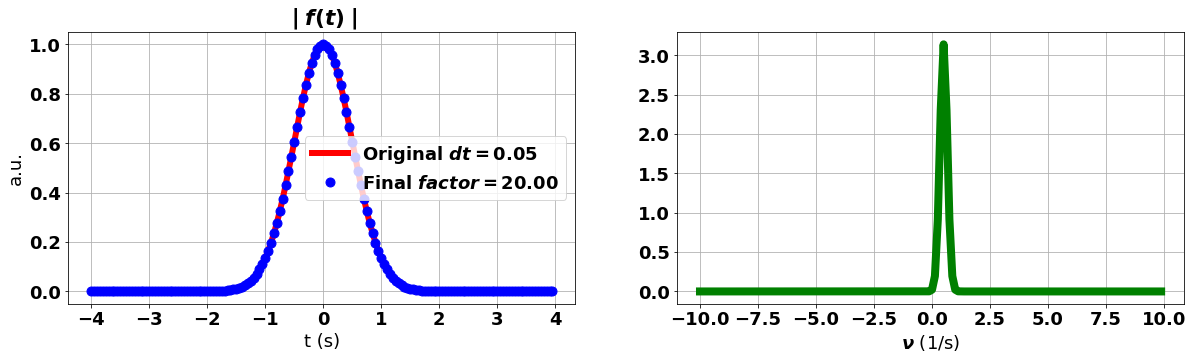

In [ ]:
dt = 0.05
###########################
factor = 1/(dt) #el factor correcto es 1/dt
###########################
factorc = 1./dt
print('Factor usado = %.2f' % factor)
print('Factor correcto = %.2f' % factorc)


t = np.arange(-4,4,dt)
ft = np.exp(-(t)**2)*np.exp(1j*np.pi*t)

font = {'weight' : 'bold', 'size'   : 18}
matplotlib.rc('font', **font)
plt.figure()
plt.subplot(1,2,1)
plt.plot(t,abs(ft)**2,color='red',linewidth=6,label='Original $dt = %.2f$' % dt)
plt.title('$\mid f(t) \mid$')
plt.xlabel('t (s)')
plt.ylabel('a.u.')

fv = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
v = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size)) # Recuerde que la DFT determina es la frecuencia

ft2 = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(fv)))*factor
plt.plot(t,abs(ft2)**2,marker='.',color='blue',ls='',markersize=18,label='Final $factor = %.2f$' % factor)
plt.legend()
plt.grid()


plt.subplot(1,2,2)
plt.plot(v,abs(fv)**2,color='green',linewidth=8)
plt.xlabel(r'$\nu$ (1/s)')
plt.grid()

# Cálculo de la energía total en cada espacio, las unidades son arbitrarias
suma1= sum(abs(ft)**2)*dt
suma2 = sum(abs(fv)**2)*1/(dt*t.size)
suma3 = sum(abs(ft2)**2)*dt

print('Energía en plano de entrada = %f' % suma1)
print('Energía en plano Fourier = %f' % suma2)
print('Energía en plano de salida  = %f' % suma3)

$\textbf{FIGURA 11.}$ Teorema de Parseval (conservación de la energía). La línea roja es la señal original y los puntos azules son la señal recuperada luego de hacer una DFT y una DFT inversa (IDFT). Note que al no usar los factores correctos la energía de la señal recuperada es inferior a la de la original. El factor adecuado en la IDFT es 1/dt.

____

### Explicación de la razón de los factores

(Mirar Voelz, sección 2.3)

En principio podemos decir que tenemos la transformada de Fourier y la integral de Fourier unidimensional:
$$\text{FT:}  \int (\cdot) \text{d} t $$
$$\text{IFT:} \int (\cdot) \text{d} \nu$$

Pero cuando pretendemos llevar esto al computador debemos muestrear las funciones, por lo que usando la suma de Riemman tenemos:
$$\text{FT muestreada:} \sum (\cdot) \Delta t$$
$$\text{IFT muestreada:} \sum (\cdot) \Delta \nu$$

Ahora, los programas traen el algoritmo (en particular el FFT) que no incluye los factores delta, y que incluye un factor en la inversa:
$$\text{DFT:} \sum (\cdot) $$
$$\text{IDFT:} \frac{1}{N} \sum (\cdot) $$
donde $N$ es el tamaño del arreglo.

Por otro lado, estrictamente hablando la energía se debe conservar como lo demuestra el teorema de Parseval, luego:
$$ \int \mid f(t) \mid^2 \text{d} t = \int \mid f(\nu) \mid^2 \text{d} \nu $$

$$ \sum \mid f(t) \mid^2 \Delta t = \sum \mid f(\nu) \mid^2 \Delta \nu $$

Entonces para que esto se cumpla se debe multiplicar las transformadas por los respectivos deltas, es decir:
$$FT: F(\nu) = FFT(f(t))\cdot \Delta t$$
$$IFT: f(t) = IFFT(F(\nu)) \cdot \frac{1}{\Delta t}$$

Note que la IFT debería haberse multiplicado por el factor $\Delta \nu = \frac{1}{N \Delta t}$, pero como la IDFT trae el factor $\frac{1}{N}$ por defecto solo se multiplica por $\frac{1}{\Delta t}$.

No olviden que si buscan medir la energía total en cada espacio debe multiplicar la suma por el factor correspondiente para que se corresponda con la integral:
$$ SUMA( \mid f(t) \mid^2) \Delta t = SUMA (\mid F(\nu) \mid^2) \Delta \nu $$

# 2. ANÁLISIS DE FOURIER

##IMPORTANTE##
***Para que esta parte se ejecute correctamente deberá hacer lo siguiente:***
- Una copia en la carpeta "Colab Notebooks".
- Guardar los archivos WAV "audiocheck.net_sin_440Hz_-3dBFS_3s.wav", "piano-a.wav" y "prueba.wav" en la carpeta "Colab Notebooks".
- En la siguiente línea le pedirá abrir un link, escoger la cuenta donde trabajará, dar un permiso, y copiar un enlace para luego escribirlo en el recuadro. Esto es para poder leer los archivos del Google drive de la cuenta elegida.

***######################################################################***

Cuando se habla de análisis de Fourier simplemente se refiere a que se hará una transformación de Fourier para estudiar una función en términos de sus componentes en la expansión de Fourier. Por ejemplo, si tenemos una señal sonora díficil de analizar podemos ir al espacio de las frecuencias y estudiar que frecuencias componen dicha señal. En este espacio también podemos modificar las frecuencias para modificar la señal. Este tipo de análisis es usado en un gran número de campos de estudio como la óptica, la ciencia de los materiales, la astronomía, el sonido, entre otros.

Haremos un primer ejemplo analizando una señal sonora que se encuentra en un archivo WAV.

In [ ]:
#############
# Código de Google Colaboratory para subir el archivo WAV y trabajar con él
from google.colab import drive
drive.mount('/content/gdrive')

#!cp '/content/gdrive/My Drive/CURSOS/Física Experimental III/03 - ANALISIS FOURIER/audiocheck.net_sin_440Hz_-3dBFS_3s.wav' 'audiocheck.net_sin_440Hz_-3dBFS_3s.wav'
#!cp '/content/gdrive/My Drive/CURSOS/Física Experimental III/03 - ANALISIS FOURIER/piano-a.wav' 'piano-a.wav'
#!cp '/content/gdrive/My Drive/CURSOS/Física Experimental III/03 - ANALISIS FOURIER/prueba.wav' 'prueba.wav'
!cp '/content/gdrive/My Drive/Colab Notebooks/audiocheck.net_sin_440Hz_-3dBFS_3s.wav' 'audiocheck.net_sin_440Hz_-3dBFS_3s.wav'
!cp '/content/gdrive/My Drive/Colab Notebooks/piano-a.wav' 'piano-a.wav'
!cp '/content/gdrive/My Drive/Colab Notebooks/prueba.wav' 'prueba.wav'
#############

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt
from scipy.io import wavfile
import cmath as cm
import IPython.display as ipd


%matplotlib inline
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20)
#matplotlib.rc('ytick', labelsize=20)
font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)


In [ ]:
ti = 0.2 # tiempo inicial en segundos para la segunda gráfica de la figura "NOTA PIANO"
tf = 0.3 # tiempo final para la segunda gráfica de la figura "NOTA PIANO"
fi = 0 # frecuencia inicial para la cuarta gráfica de la figura "NOTA PIANO"
ff = 500 # frecuencia final para la cuarta gráfica de la figura "NOTA PIANO"

Frecuencia grabación fs = 44100.0 datos/s
Número de datos = 132301
Duración = 3.000023 s
Muestreo temporal = 0.000023 s


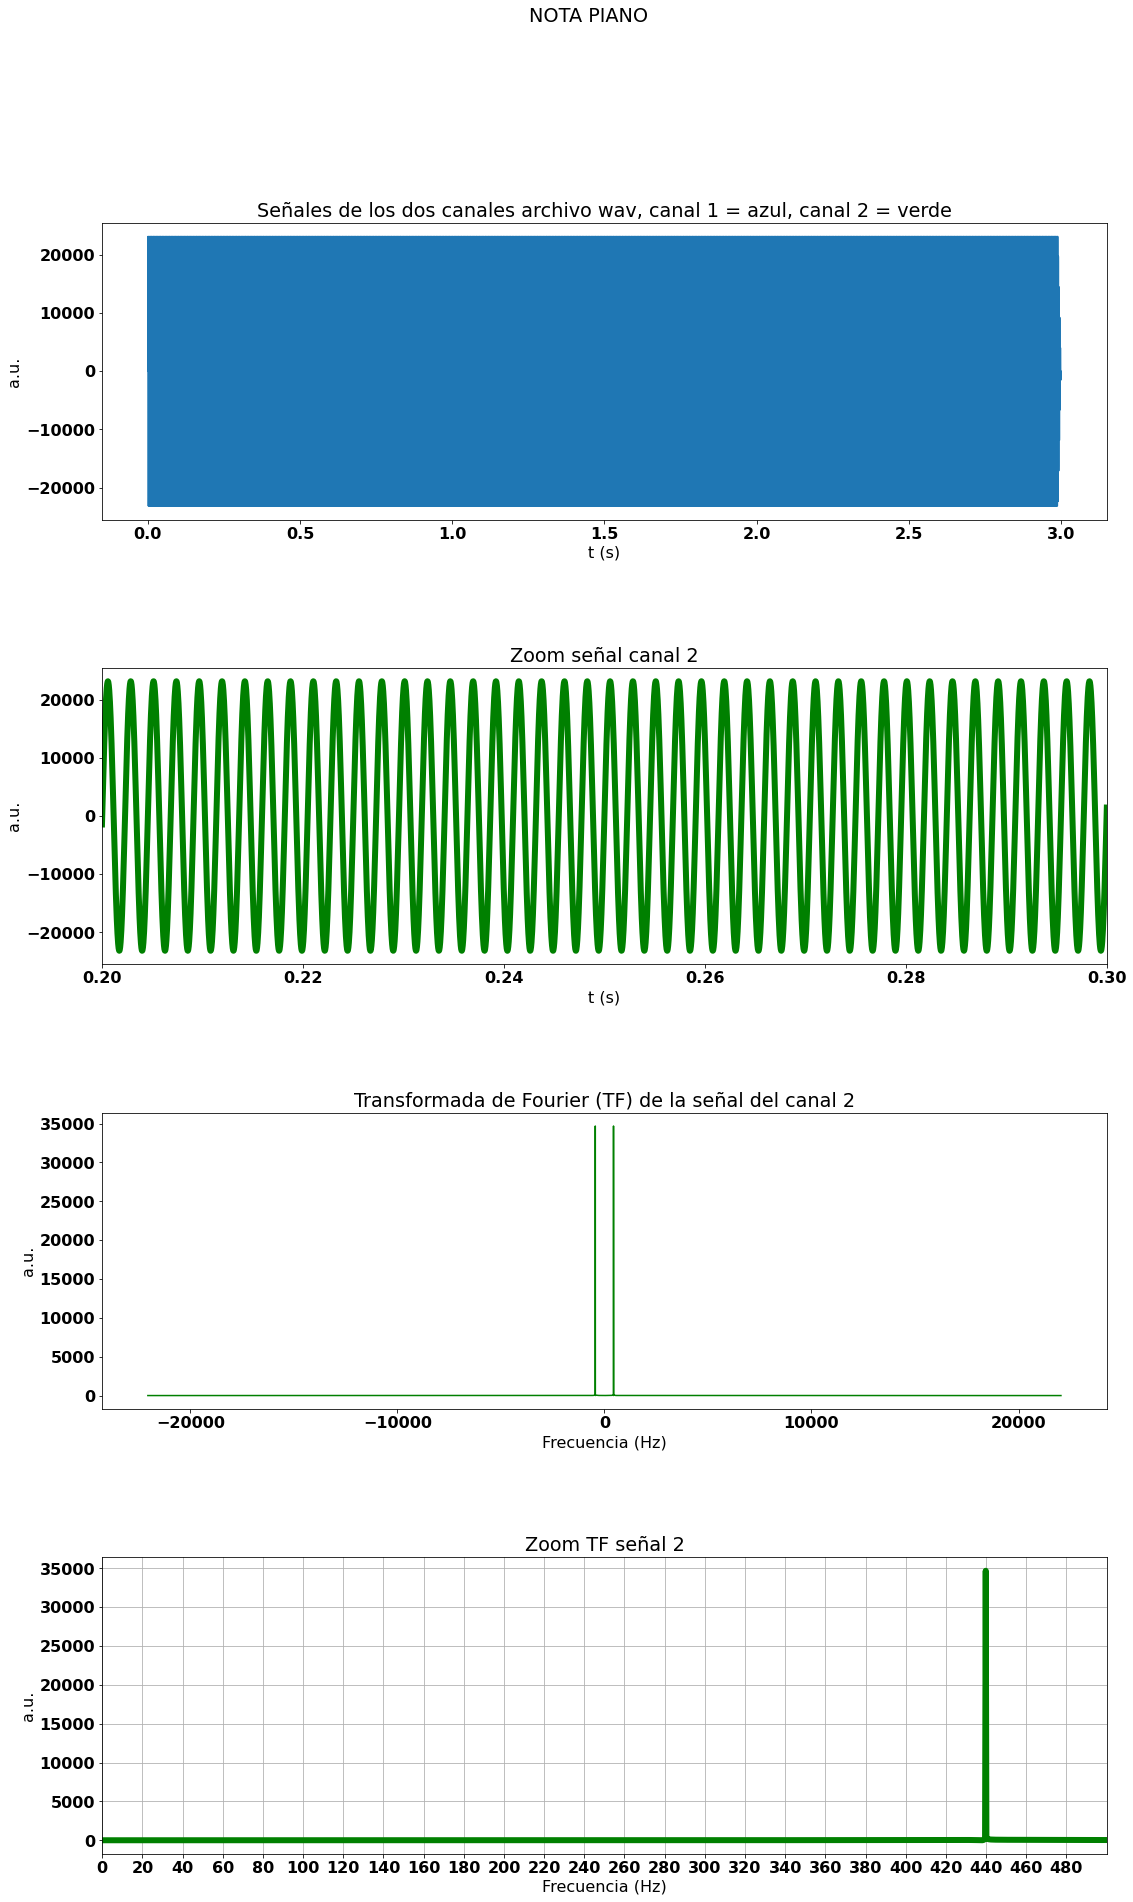

In [ ]:
# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('NOTA PIANO')

################################################
# Librería: from scipy.io import wavfile
#Datos un canal
fs, data = wavfile.read('audiocheck.net_sin_440Hz_-3dBFS_3s.wav')

tamdata = data.size
duration = tamdata/fs
dt = duration/tamdata
t = np.arange(0,duration,dt)

print('Frecuencia grabación fs = %.1f datos/s' % fs)
print('Número de datos = %.f' % tamdata)
print('Duración = %f s'  % duration)
print('Muestreo temporal = %f s' % dt)

plt.subplot(4,1,1)
plt.plot(t,data)
plt.title('Señales de los dos canales archivo wav, canal 1 = azul, canal 2 = verde')
plt.ylabel('a.u.')
plt.xlabel('t (s)')
plt.subplot(4,1,2)
plt.plot(t,data,color='green',linewidth=6)
plt.title('Zoom señal canal 2')
plt.ylabel('a.u.')
plt.xlabel('t (s)')
plt.xlim(ti,tf)
########################################################


dataft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))
#freq = freq[0:freq.size-1]


dataft_phase = np.zeros((dataft.size))
for cont in range(0,dataft_phase.size):
    dataft_phase[cont] = cm.phase(dataft[cont])

plt.subplot(4,1,3)
plt.plot(freq,abs(dataft),color='green')
plt.title('Transformada de Fourier (TF) de la señal del canal 2')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')

plt.subplot(4,1,4)
plt.plot(freq,abs(dataft),color='green',linewidth=6)
plt.title('Zoom TF señal 2')
plt.xlim(fi,ff)
plt.xticks(np.arange(fi,ff,20))
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.show()

ipd.Audio('audiocheck.net_sin_440Hz_-3dBFS_3s.wav') # load a local WAV file

$\textbf{FIGURA 12.}$ Señal sonora de un piano. Señal sonora en el tiempo con dos canales para el sonido stereo, zoom hecho a uno de los canales, espectro de frecuencias de la señal en el canal 2 (note la simetría con respecto al origen), zoom al espectro de frecuencias de la señal del canal 2.
___

In [ ]:
ti = 0.2 # tiempo inicial en segundos para la segunda gráfica de la figura "NOTA PIANO"
tf = 0.3 # tiempo final para la segunda gráfica de la figura "NOTA PIANO"
fi = 0. # frecuencia inicial para la cuarta gráfica de la figura "NOTA PIANO"
ff = 1500. # frecuencia final para la cuarta gráfica de la figura "NOTA PIANO"

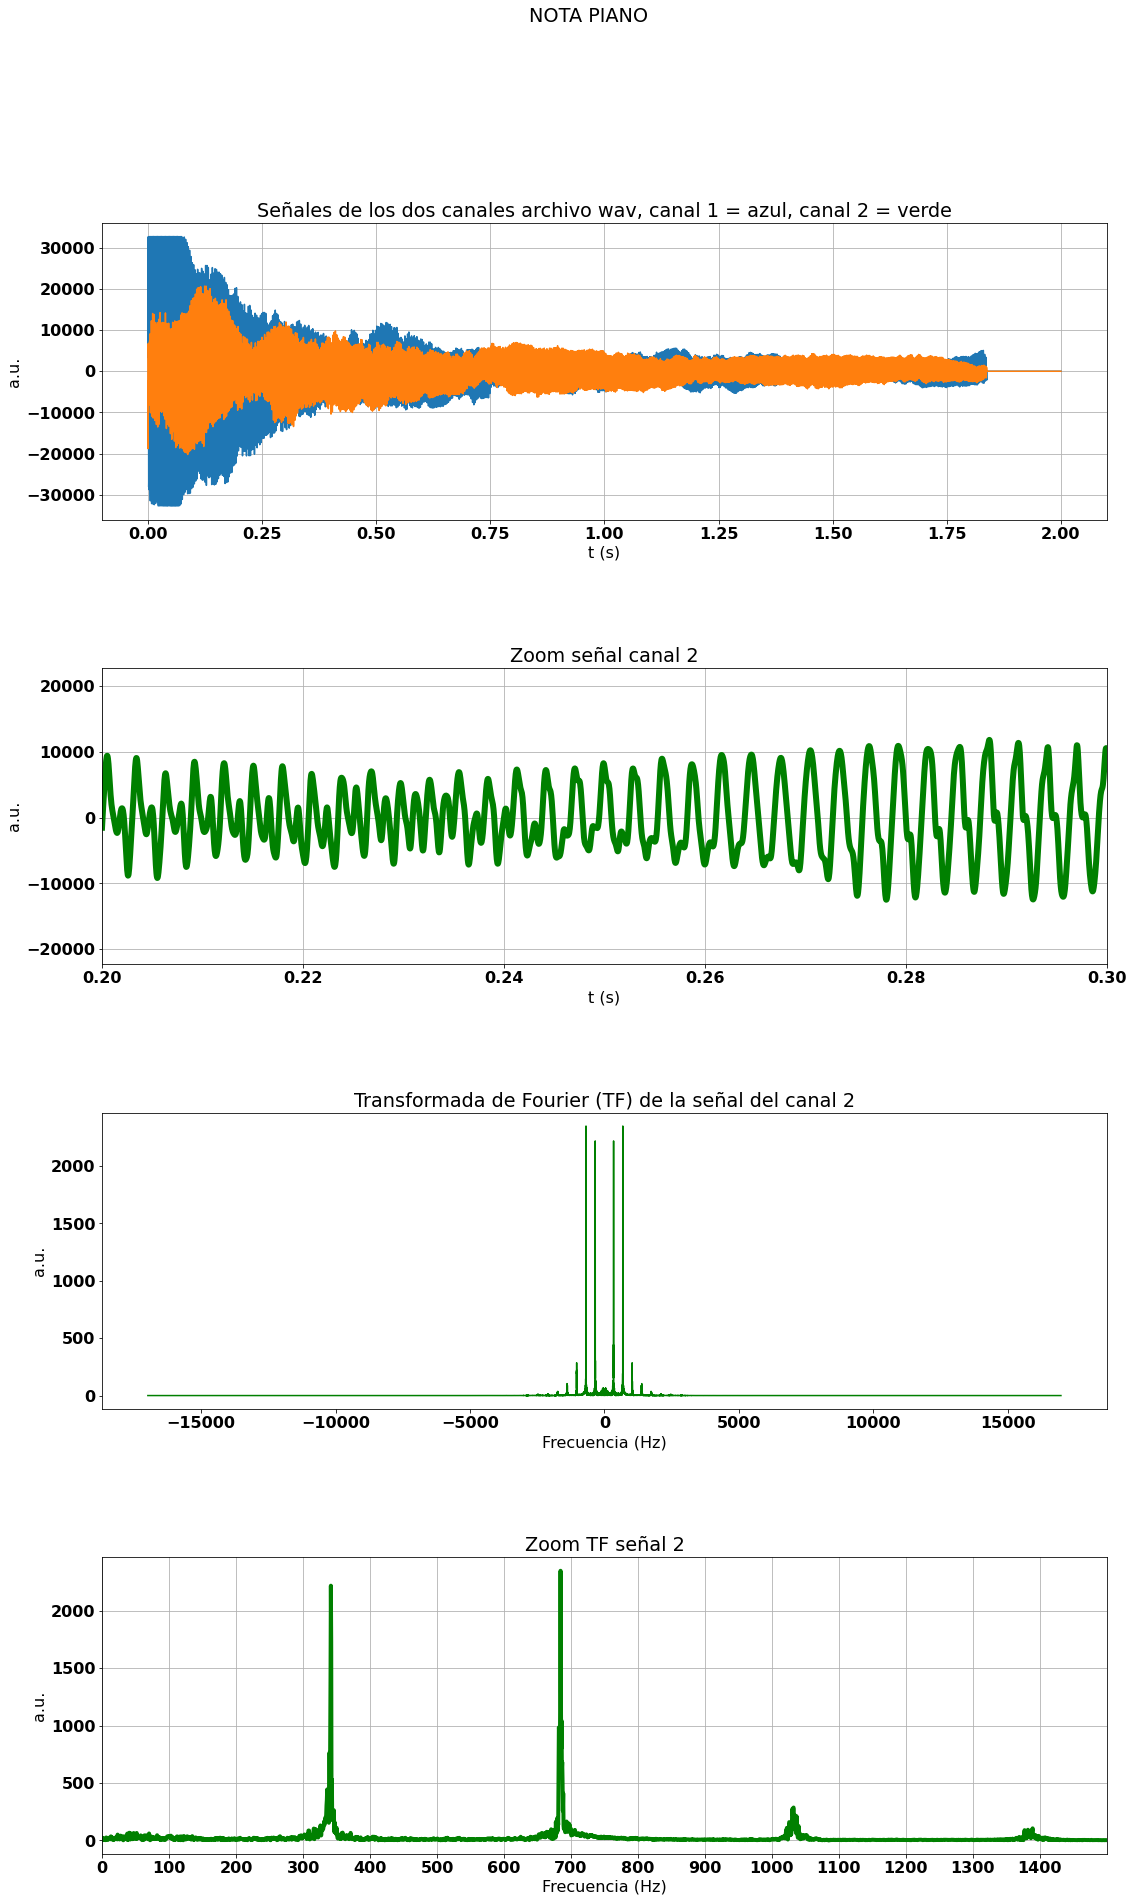

In [ ]:
# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('NOTA PIANO')

#################################################
#Datos 2 canales
fs, data = wavfile.read('piano-a.wav')
duration = 2. # segundos


tamdata = data[:,1].size
dt = duration/tamdata
t = np.arange(0,duration,dt)

plt.subplot(4,1,1)
plt.plot(t,data)
plt.title('Señales de los dos canales archivo wav, canal 1 = azul, canal 2 = verde')
plt.ylabel('a.u.')
plt.xlabel('t (s)')
plt.grid()

plt.subplot(4,1,2)
plt.plot(t,data[:,1],color='green',linewidth=6)
plt.title('Zoom señal canal 2')
plt.ylabel('a.u.')
plt.xlabel('t (s)')
plt.xlim(ti,tf)
plt.grid()

#############################################################################
dataft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data[:,1])))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

dataft_phase = np.zeros((dataft.size))
for cont in range(0,dataft_phase.size):
    dataft_phase[cont] = cm.phase(dataft[cont])

plt.subplot(4,1,3)
plt.plot(freq,abs(dataft),color='green')
plt.title('Transformada de Fourier (TF) de la señal del canal 2')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')

plt.subplot(4,1,4)
plt.plot(freq,abs(dataft),color='green',linewidth=4)
plt.title('Zoom TF señal 2')
plt.xlim(fi,ff)
plt.xticks(np.arange(fi,ff,100))
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.show()

ipd.Audio('piano-a.wav') # load a local WAV file

$\textbf{FIGURA 13.}$ Señal sonora de un piano. Señal sonora en el tiempo con dos canales para el sonido stereo, zoom hecho a uno de los canales, espectro de frecuencias de la señal en el canal 2 (note la simetría con respecto al origen), zoom al espectro de frecuencias de la señal del canal 2.
___

Note que en las señales anteriores hemos graficado solamente el módulo de la TF, pero la TF también tiene información de fase que es de suma importancia. A continuación se presenta la información de fase y amplitud del espectro de frecuencias en una ampliación.

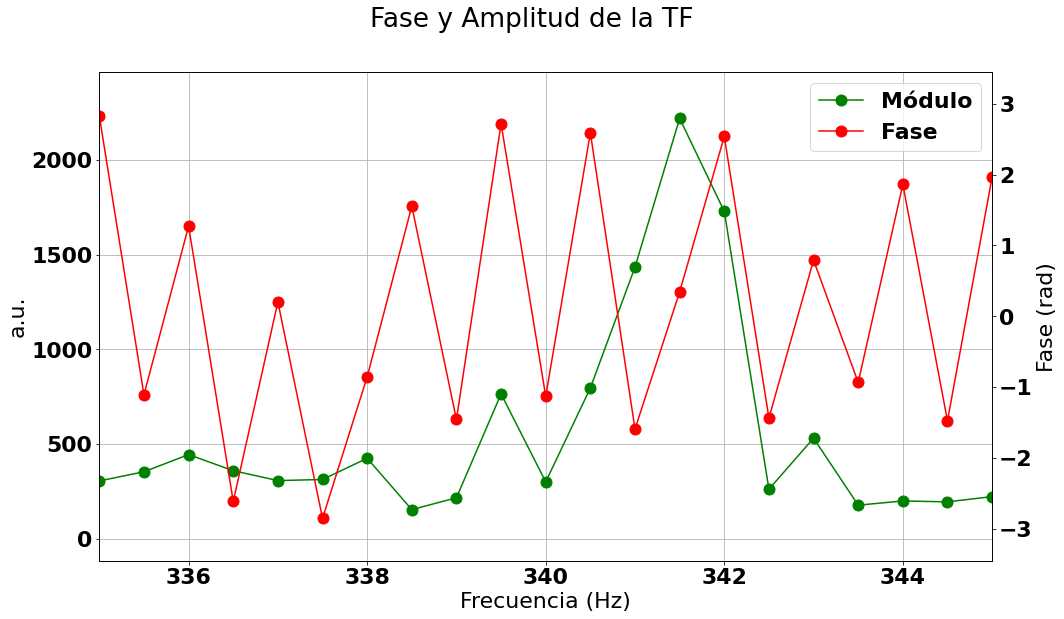

In [ ]:
fi = 335 # frecuencia inicial de la figura "NFase y Amplitud de la TF"
ff = 345 # frecuencia final de la figura "NFase y Amplitud de la TF"


######################
font = {'weight' : 'bold', 'size'   : 22}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(16,9))
fig.suptitle('Fase y Amplitud de la TF')

ax1 = plt.subplot()
lns1 = ax1.plot(freq,abs(dataft),marker='o',color='green',markersize=11,label='Módulo')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
#ax1.legend()
plt.grid()

ax2 = ax1.twinx()
lns2 = ax2.plot(freq,dataft_phase,color='red',marker='o',markersize=11,label='Fase')
plt.xlim(fi,ff)
plt.ylabel('Fase (rad)')


# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

$\textbf{FIGURA 8.}$ Fase y amplitud del espectro de frecuencias de la señal sonora del canal 2. Esta es la frecuencia fundamental del sonido y está cercana a la nota F4 = 349.23 Hz.
___

Para mirar la importancia de la fase invirtamos la señal anterior, miremos su espectro, gravemos la señal como archivo audio y oigamos el sonido.

In [ ]:
#########################
#Librería necesaria para descargar archivos al PC, en Colaboratory
from google.colab import files

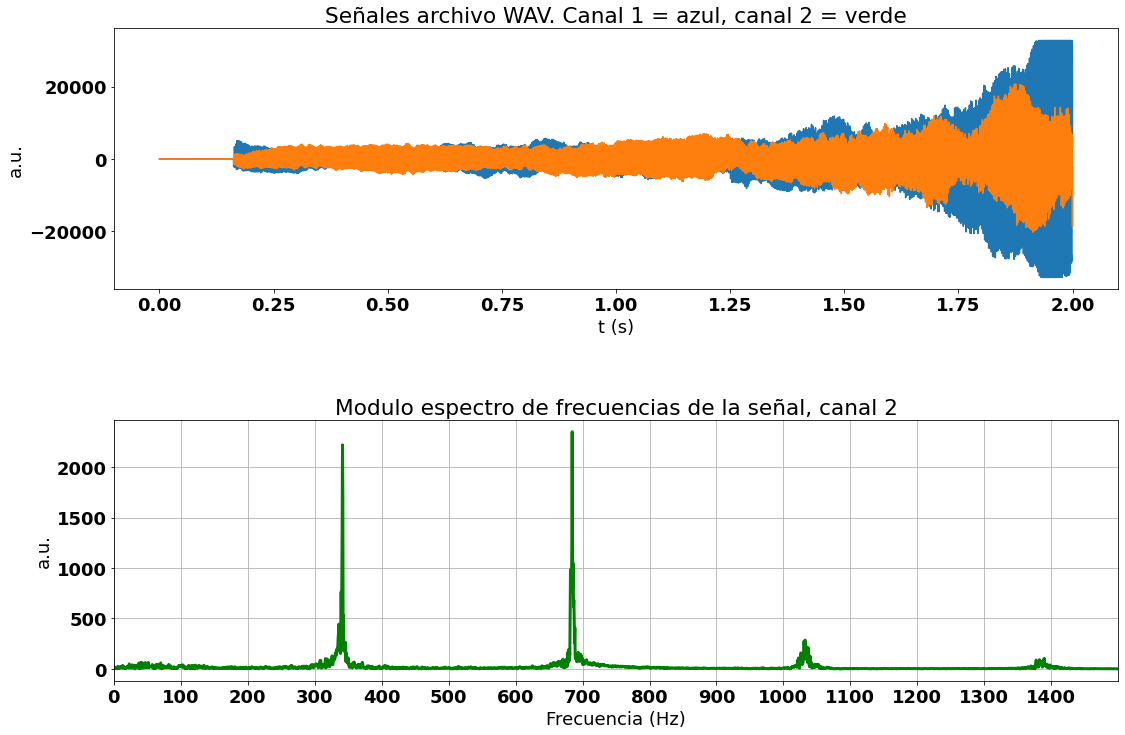

In [ ]:
#########################
# Rango en el que se quiere ver el espacio de frecuencias
fi = 0. # Frecuencia menor
ff = 1500. #Frecuencia mayor
#########################

alreves = data[::-1]
wavfile.write('alreves.wav',fs,alreves)
##################
# Para descargar al PC en google Colaboratory
#files.download('alreves.wav')
##################


# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,12))
fig.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
plt.plot(t,alreves)
plt.title('Señales archivo WAV. Canal 1 = azul, canal 2 = verde')
plt.ylabel('a.u.')
plt.xlabel('t (s)')


revft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(alreves[:,1])))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

revft_phase = np.zeros((revft.size))
for cont in range(0,revft_phase.size):
    revft_phase[cont] = cm.phase(revft[cont])


plt.subplot(2,1,2)
plt.plot(freq,abs(revft),color='green',linewidth=3)
plt.title('Modulo espectro de frecuencias de la señal, canal 2')
plt.xlim(fi,ff)
plt.xticks(np.arange(fi,ff,100))
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.grid()

ipd.Audio('alreves.wav') # load a local WAV file

$\textbf{FIGURA 9.}$ Señal invertida y su espectro de frecuencias (solo la amplitud o módulo).

Note que aunque hemos invertido la señal y por consiguiente oímos un sonido diferente, el módulo del espectro es el mismo, luego ¿dónde está la información de la inversión?. Si hacemos un Zoom y comparamos con la senal original encontraremos que dicha información está en la fase, miremos la siguiente figura.

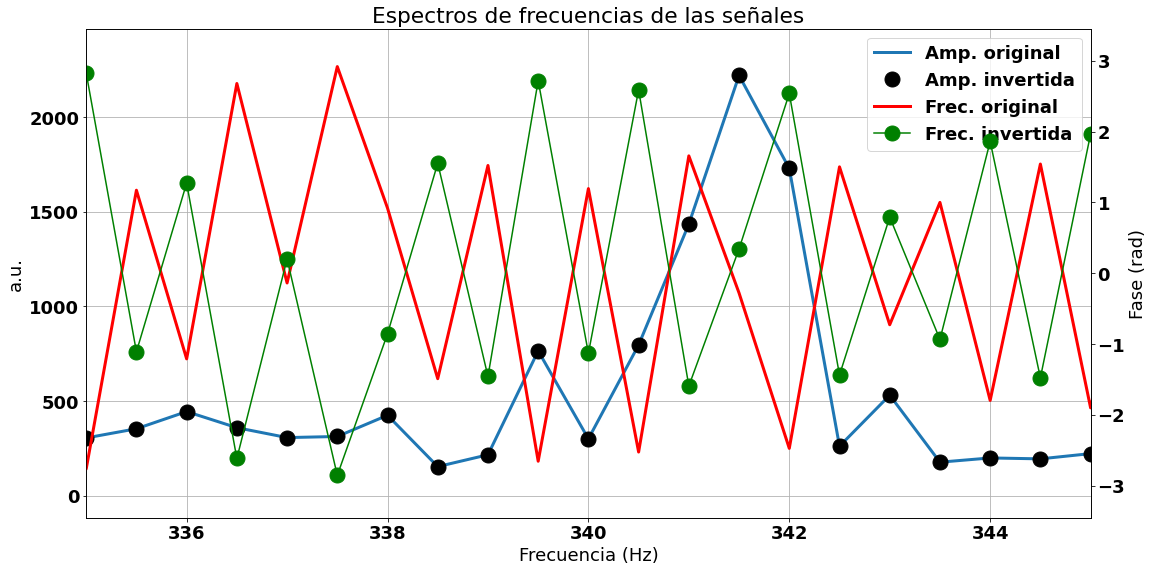

In [ ]:
#########################
# Rango en el que se quiere ver el espacio de frecuencias
fi = 335. # Frecuencia menor
ff = 345. #Frecuencia mayor
#########################

plt.figure(figsize=(18,9))
ax1 = plt.subplot()
lns1 = ax1.plot(freq,abs(revft),linewidth=3,label='Amp. original')
lns2 = ax1.plot(freq,abs(dataft),color='black',marker='o',markersize=15,ls='',label='Amp. invertida')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.title('Espectros de frecuencias de las señales')
plt.grid()

ax2 = ax1.twinx()
lns3 = ax2.plot(freq,revft_phase,color='red',linewidth=3,label='Frec. original')
lns4 = ax2.plot(freq,dataft_phase,color='green',marker='o',markersize=15,label='Frec. invertida')
plt.xlim(fi,ff)
plt.ylabel('Fase (rad)')


# added these three lines
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)


plt.show()

$\textbf{FIGURA 10.}$ Fase y amplitud del espectro de frecuencias, de la señal original e invertida.
___

### Fase, amplitud y variables conjugadas

En el siguiente ejemplo se puede observar el efecto en la fase cuando una señal se adelanta o retrasa temporalmente. Igualmente calcularemos el producto entre los anchos de la señal y su espectro. Para esto se usará el criterio de FWHM (Full width at half maximum, Ancho total a la mitad del máximo). Note que el producto permanece aproximadamente constante y tiene un mínimo que no sobrepasa. Esto es una propiedad de las variables o espacios conjugados. Para este ejemplo el tiempo y la frecuencia angular son variables conjugadas.

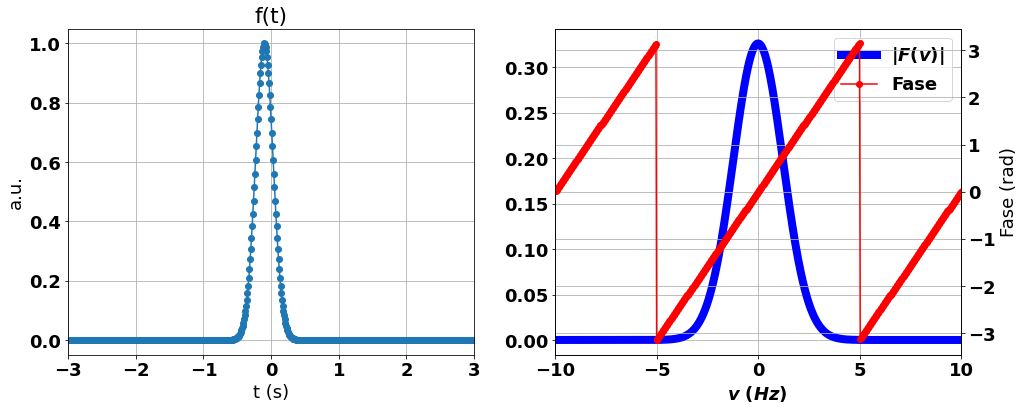

In [ ]:
#####################
#### Cambiar estos valores y observar la figura
delay = -0.1   # tiempo de retardo de la señal en segundos
FWHM_s = 0.5  # FWHM de la señal (introducir)
#####################

var = FWHM_s/(2*np.square(2*np.log(2)))

dt = 0.01
t = np.arange(-15,15,dt)
ft = np.exp(-(t-delay)**2/(2*var**2))

plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(t,ft,marker='o')
plt.title('f(t)')
plt.xlabel('t (s)')
plt.ylabel('a.u.')
plt.xlim(-3.0,3.0)
plt.grid()

fv = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft))*dt)
#absfv = abs(fv)
v = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))
fv_phase = np.zeros((fv.size))
for cont in range(0,fv_phase.size):
    fv_phase[cont] = cm.phase(fv[cont])

ax2 = plt.subplot(1,2,2)
lns1 = ax2.plot(v,abs(fv),color='blue',lw=8,label='$\|F(v)\|$')
plt.xlabel('$v \\ (Hz)$ ')
plt.grid()

ax3 = ax2.twinx()
lns2 = ax3.plot(v,fv_phase,color='red',marker='o',label='Fase')
plt.xlim(-10.0,10.0)
plt.ylabel('Fase (rad)')
plt.grid()

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1)

plt.show()

$\textbf{FIGURA 11.}$ Señal adelantada un determinado delay y su espectro de frecuencias. Note como cambia la fase a medida que cambia el delay, mientras que la amplitud permanece constante.
___

Si para el ejemplo anterior modificamos el FWHM de la señal y determinamos el FWHM del espectro, y calculamos el producto encontraremos que este no cambia (pequeñas variaciones por el error computacional) como se puede observar en la figura anterior. Miremos un resultado típico para el ejemplo anterior cuando no hay delay:

In [ ]:
#############
# Esta celda determina los anchos FWHM de la función y del espectro
# y calcula el producto de los anchos. Esto para los valores de la gráfica
# anterior
#############

# Función para encontrar el punto más cercano a un valor en un arreglo
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

absfv = abs(fv)
value = find_nearest(absfv, np.max(absfv)/2) # valor en el arreglo fw más cercano a la mitad del máximo
pos = np.where(absfv == value) # posición en el arreglo
pos0 = np.where(absfv == np.max(absfv)) # posición del máximo
dif = pos0[0]-pos[0] # número de posiciónes entre el maximo y el valor medio
FWHM_e = 2*np.abs(dif[0])*(1/(dt*t.size)) # FWHM

print('Para la señal FWHM_s = %.2f' % FWHM_s)
print('Para el espectro FWHM_e = %.2f' % FWHM_e)

#var = FWHM_s/(2*np.square(2*np.log(2)))
producto = FWHM_s*FWHM_e
print('El producto de los FWHM es %.2f' % producto)

Para la señal FWHM_s = 0.50
Para el espectro FWHM_e = 2.87
El producto de los FWHM es 1.43


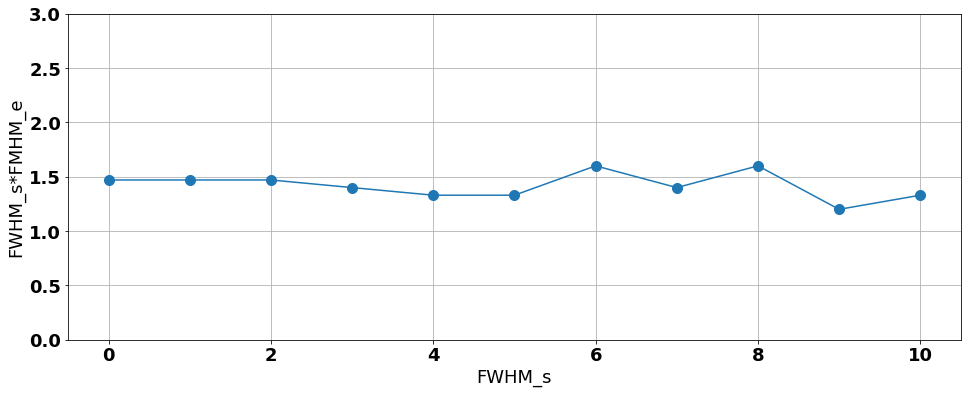

In [ ]:
#El valor para FWHM_s = 0 se pone a mano
pro = [ 1.47 ,1.47 ,1.47, 1.40, 1.33, 1.33, 1.60, 1.40, 1.60, 1.20, 1.33]
plt.figure(figsize=(16,6))
plt.plot(pro, marker='.',markersize=20)
plt.ylim(0,3)
plt.ylabel('FWHM_s*FMHM_e')
plt.xlabel('FWHM_s')
plt.grid()
plt.show()

$\textbf{FIGURA 12.}$ Demostración de la no variación de la relación entre los anchos de la señal y el espectro.
___

***Pregunta***: ¿Qué pasaría si la señal tuviera un delay, qué daría el producto, mayor o menor que el caso donde no hay delay?

### Filtrado de frecuencias
Algo más que se puede hacer es modificar el espectro, por ejemplo eliminando frecuencias (filtrado). Filtremos las frecuencias entre 100 Hz y 200 Hz del canal 1 de nuestra señal de estudio, gravemos el resultado en un archivo WAV y determinemos si hubo algún cambio.

34468.0


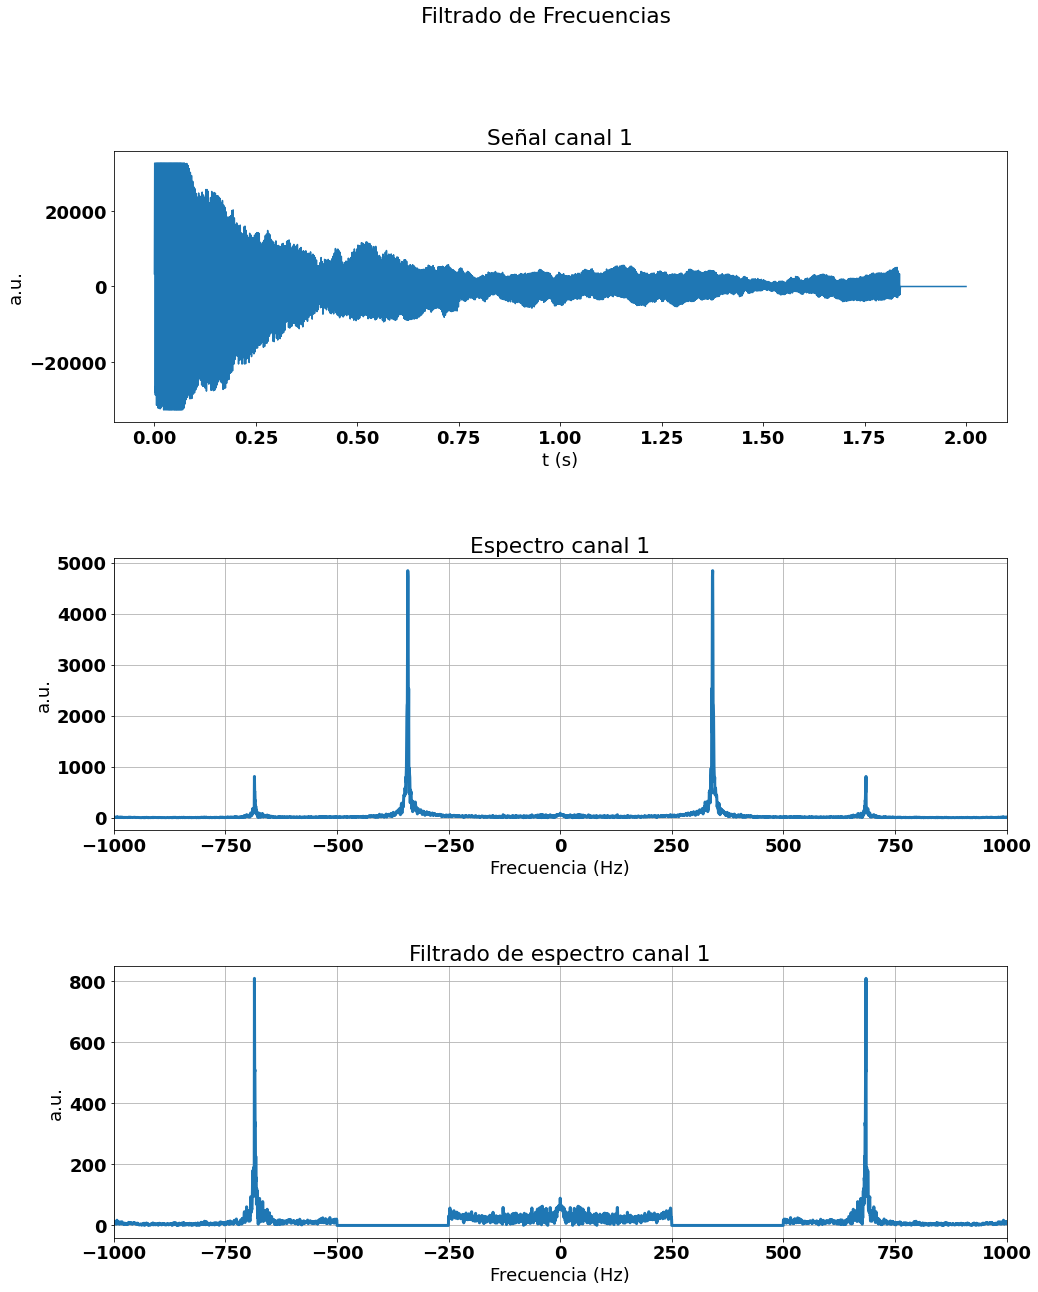

In [ ]:
# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(16,20))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Filtrado de Frecuencias')

#Datos
fs, data = wavfile.read('piano-a.wav')
duration = 2. # segundos

tamdata = data[:,1].size
dt = duration/tamdata
t = np.arange(0,duration,dt)

plt.subplot(3,1,1)
plt.plot(t,data[:,0])
plt.title('Señal canal 1')
plt.ylabel('a.u.')
plt.xlabel('t (s)')

dataft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data[:,0])))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

dataft_phase = np.zeros((dataft.size))
for cont in range(0,dataft_phase.size):
    dataft_phase[cont] = cm.phase(dataft[cont])

plt.subplot(3,1,2)
plt.plot(freq,abs(dataft),linewidth=3)
plt.xlim(-1000,1000)
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.title('Espectro canal 1')
plt.grid()

#######################
#Rango de frecuencias que se quieren eliminar
freqini = 250
freqfinal = 500
#######################

dataft_cut = np.copy(dataft)
freqinf = int(freqini/(1/(dt*t.size)))
freqsup = int(freqfinal/(1/(dt*t.size)))
print(tamdata/2 + freqinf)

dataft_cut[int(tamdata/2 + freqinf): int(tamdata/2 + freqsup)] = 0 + 1j*0
dataft_cut[int(tamdata/2 - freqsup): int(tamdata/2 - freqinf)] = 0 + 1j*0
plt.subplot(3,1,3)
plt.plot(freq,abs(dataft_cut),linewidth=3)
plt.xlim(-1000,1000)
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.title('Filtrado de espectro canal 1')
plt.grid()
plt.show()

$\textbf{FIGURA 13.}$ Señal, espectro y espectro filtrado del canal uno.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


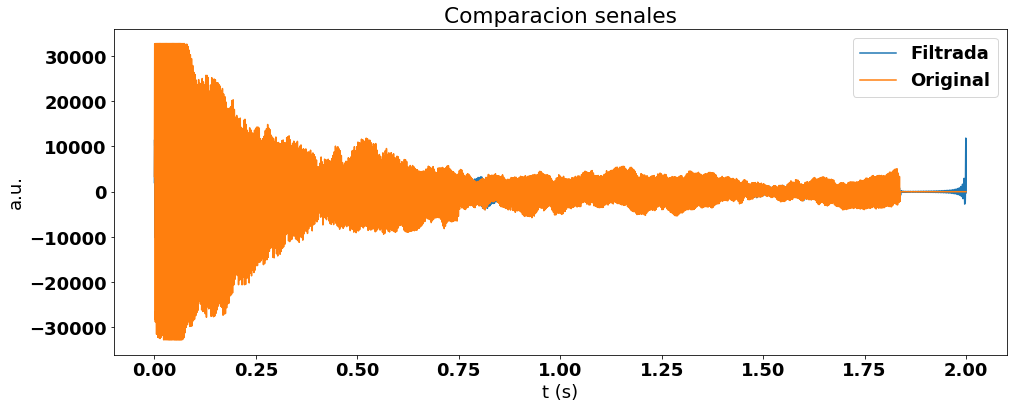

Nota piano original:


Filtrada:


In [ ]:
# Transformada inversa y guardado de la nueva señal

datacut = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(dataft_cut)))*1/dt

Real_datacut = np.array([datacut,datacut])
Real_datacut = np.real(np.transpose(np.int16(Real_datacut)))

plt.figure(figsize=(16,6))
plt.plot(t,Real_datacut[:,0],label='Filtrada')
plt.plot(t,data[:,0],label='Original')
plt.title('Comparacion senales')
plt.xlabel('t (s)')
plt.ylabel('a.u.')
plt.legend()
plt.show()


wavfile.write('cut.wav',fs,Real_datacut)
##################
# Para descargar al PC en google Colaboratory
#files.download('cut.wav')
##################

print('Nota piano original:')
ipd.display(ipd.Audio('piano-a.wav')) # load a local WAV file
print('Filtrada:')
ipd.display(ipd.Audio('cut.wav')) # load a local WAV file

$\textbf{FIGURA 14.}$ Comparación entre la señal y la señal filtrada.
___

### Ejercicio en clase

Tome dos señales de audio, obténga sus espectros de Fourier y realice las siguientes operaciones:
- Sume los espectros

In [ ]:
### Los siguientes comandos me permiten oír un sonido
import IPython.display as ipd
ipd.Audio('prueba.wav') # load a local WAV file

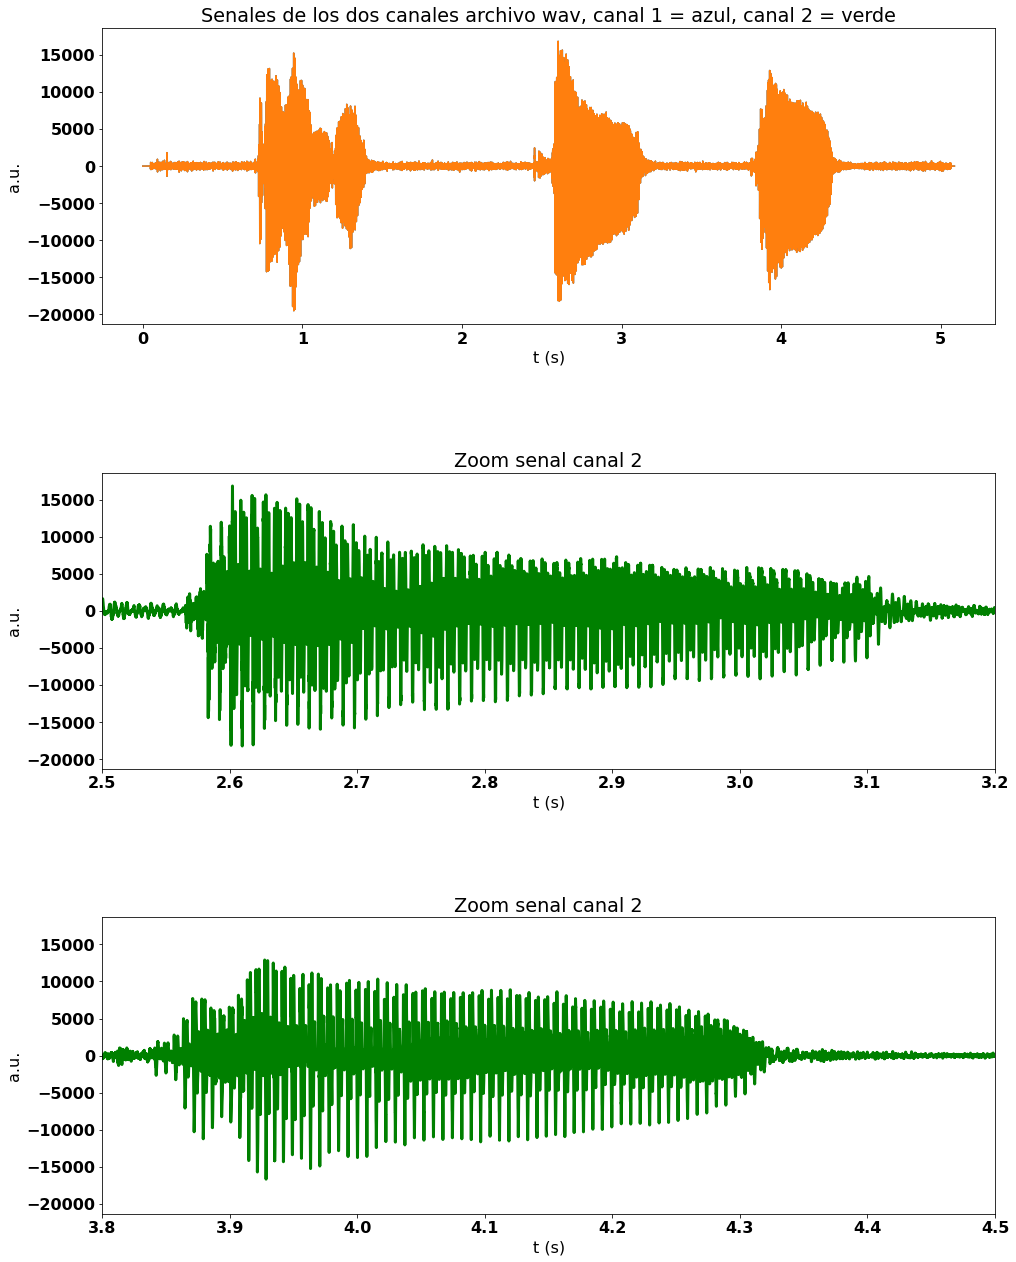

In [ ]:
# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(16,30))
fig.subplots_adjust(hspace=0.5)

ti = 2.5 # tiempo inicial en segundos
tf = 3.2 # tiempo final
ti2 = 3.8 # tiempo inicial en segundos
tf2 = 4.5 # tiempo final



#Datos
fs, data = wavfile.read('prueba.wav')

tamdata = data[:,1].size
duration = float(tamdata)/float(fs) # segundos
dt = 1/float(fs)
t = np.arange(0,duration-dt,dt)

plt.subplot(4,1,1)
plt.plot(t,data)
plt.title('Senales de los dos canales archivo wav, canal 1 = azul, canal 2 = verde')
plt.ylabel('a.u.')
plt.xlabel('t (s)')

plt.subplot(4,1,2)
plt.plot(t,data[:,1],color='green',linewidth=3)
plt.title('Zoom senal canal 2')
plt.ylabel('a.u.')
plt.xlabel('t (s)')
plt.xlim(ti,tf)

plt.subplot(4,1,3)
plt.plot(t,data[:,1],color='green',linewidth=3)
plt.title('Zoom senal canal 2')
plt.ylabel('a.u.')
plt.xlabel('t (s)')
plt.xlim(ti2,tf2)
plt.show()



$\textbf{FIGURA 15.}$ (orden descentente) Señal original, extracción de la señal 1, y extracción de la señal dos.
___

A continuación se crean los dos archivos y se determinan sus espectros

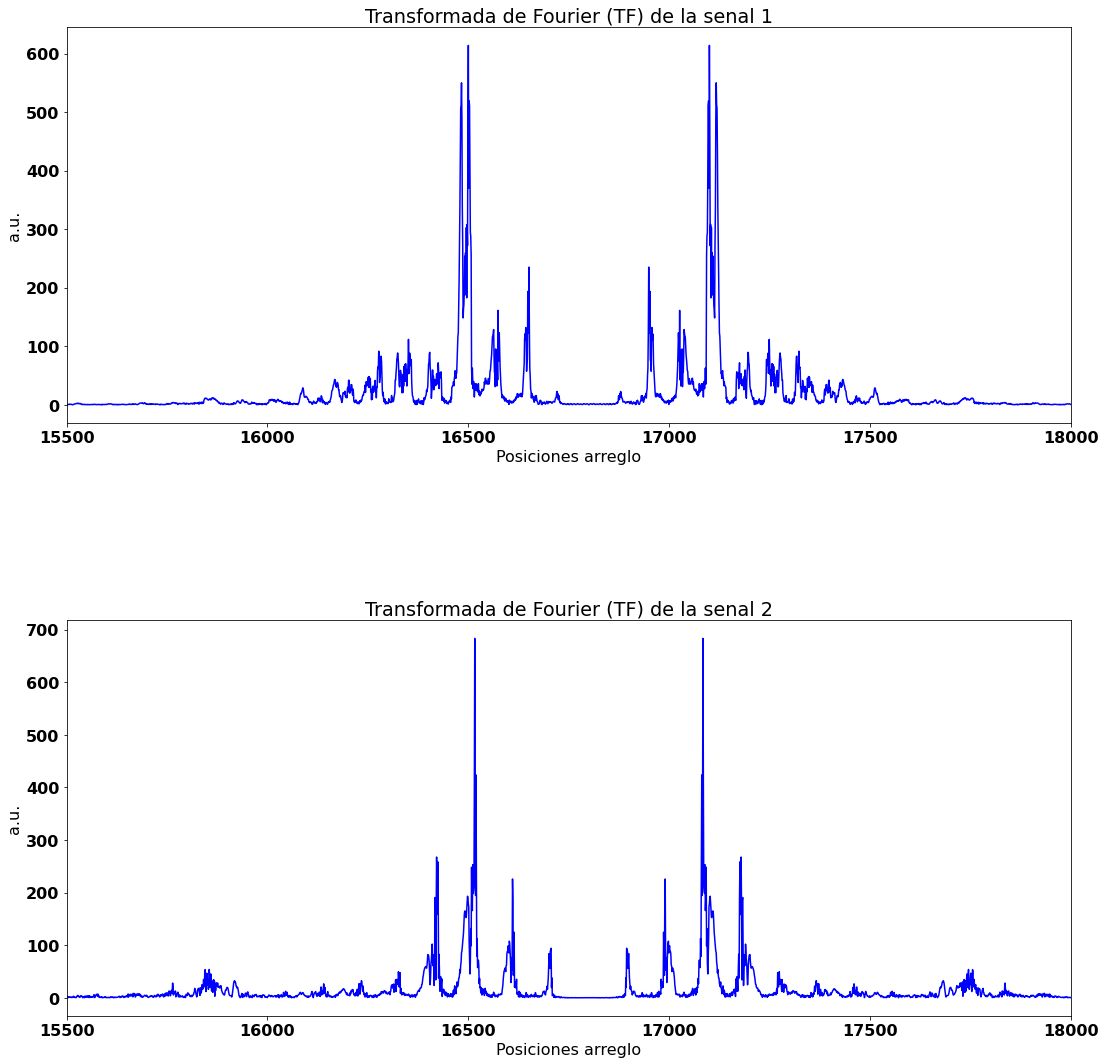

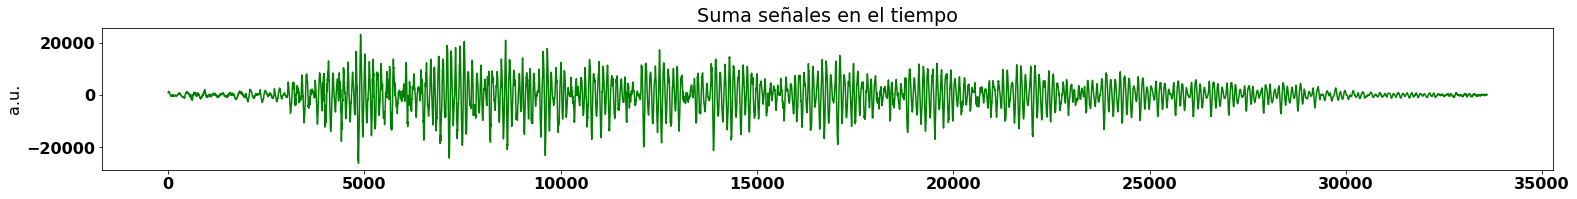

In [ ]:
# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,40))
fig.subplots_adjust(hspace=0.5)

fi = 0 # frecuencia inicial
ff = 300 # frecuencia final

senal1 = data[int(ti/dt):int(tf/dt),1]
senal2 = data[int(ti2/dt):int(tf2/dt),1]

FT_senal1 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(senal1)))*dt
FT_senal2 = np.fft.fftshift(np.fft.fft(np.fft.fftshift(senal2)))*dt
freq = np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

plt.subplot(4,1,1)
plt.plot(abs(FT_senal1),color='blue')
plt.title('Transformada de Fourier (TF) de la senal 1')
plt.ylabel('a.u.')
plt.xlabel('Posiciones arreglo')
plt.xlim(15500,18000)

plt.subplot(4,1,2)
plt.plot(abs(FT_senal2),color='blue')
plt.title('Transformada de Fourier (TF) de la senal 2')
plt.ylabel('a.u.')
plt.xlabel('Posiciones arreglo')
plt.xlim(15500,18000)
plt.show()

tsum=senal1 + senal2
plt.subplot(4,1,2)
plt.plot(tsum,color='green')
plt.title('Suma señales en el tiempo')
plt.ylabel('a.u.')
#plt.xlabel('Posiciones arreglo')
plt.show()

$\textbf{FIGURA 16.}$ Espectros de frecuencias de las señales. En las abcisas se grafica la posición en el arreglo.

Si sumamos las señales


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


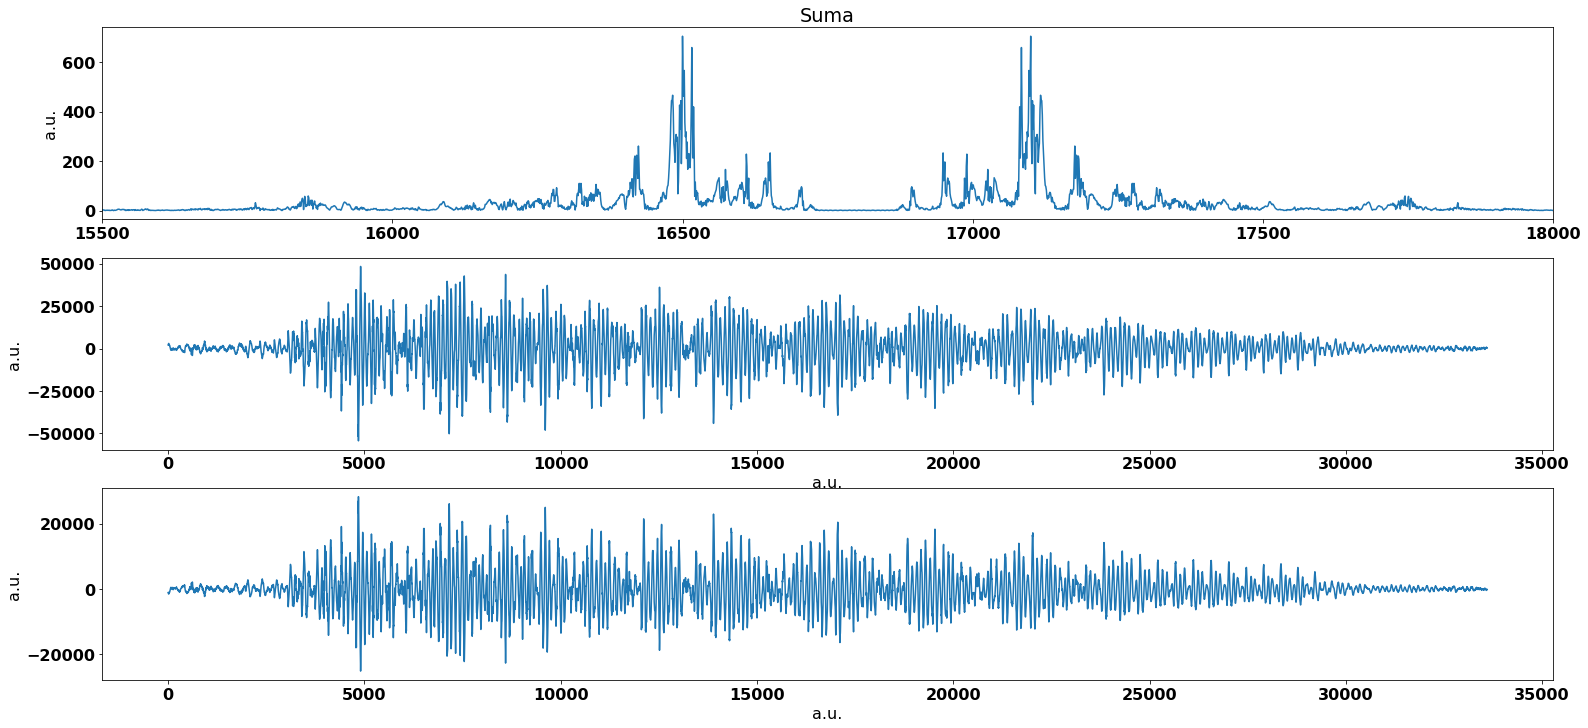

In [ ]:
FT_sum = 1*FT_senal1 + 1*FT_senal2

# Transformada inversa y guardado de la nueva señal

senal_sum = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(FT_sum)))*1/dt

senal = np.array([senal_sum,senal_sum])

senal = np.transpose(np.int16(np.real(senal)))

plt.subplot(3,1,1)
plt.plot(abs(FT_sum),label='Suma espectros')
plt.title('Suma')
plt.ylabel('a.u.')
plt.xlim(15500,18000)

plt.subplot(3,1,2)
plt.plot(senal_sum,label='Senal Suma')
plt.xlabel('a.u.')
plt.ylabel('a.u.')

plt.subplot(3,1,3)
plt.plot(tsum-senal_sum,label='Diferencia senales')
plt.xlabel('a.u.')
plt.ylabel('a.u.')


wavfile.write('suma.wav',fs,senal)
##################
# Para descargar al PC en google Colaboratory
#files.download('suma.wav')
##################

import IPython.display as ipd
ipd.Audio('suma.wav') # load a local WAV file

$\textbf{FIGURA 17.}$ Suma de las señales. Espectro de frecuencias y señal temporal. En las abcisas se grafica la posición en el arreglo.
___

***Amplitud modulada***
A continuación veremos lo que pasa cuando se tienen dos frecuencias muy cernanas y se suman sus sonidos

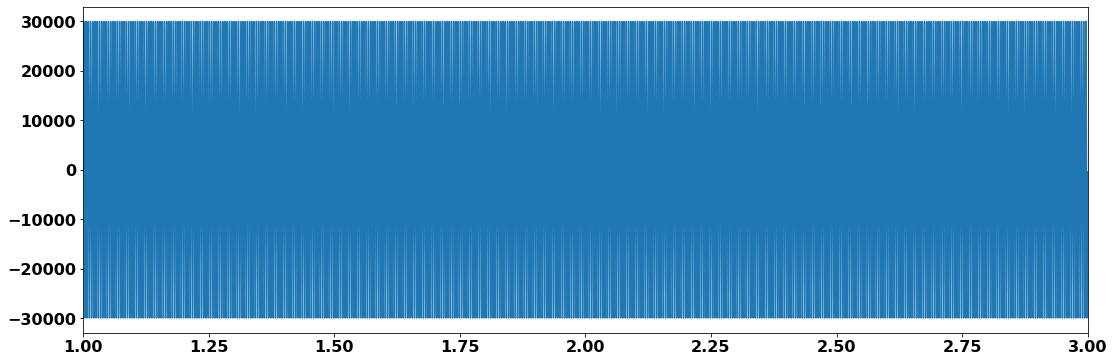

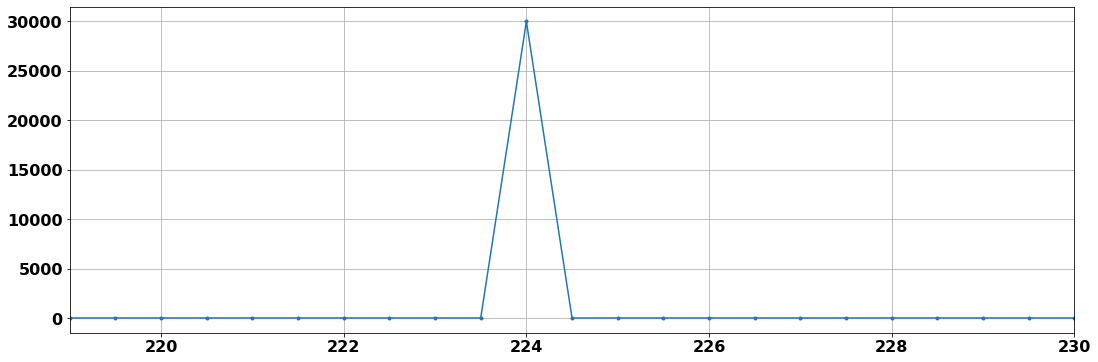

In [ ]:
# Generador de frecuencias
dt = 1.e-5
T = 3.0
t = np.arange(1.0,T,dt)

###########
# Puede modificar las frecuencias y ver que pasa
freq1 = 224.0
freq2 = 224
###########

signal1 = 0.15e5*np.sin(2.0*np.pi*freq1*t)
signal2 = 0.15e5*np.sin(2.0*np.pi*freq2*t)
signal = signal1 + signal2
signalR = np.int16(signal)

fs = int(1.0/dt)
wavfile.write('signal.wav',fs,signalR)


signal_FT = np.fft.fftshift(np.fft.fft(np.fft.fftshift(signal)))*dt
w = np.arange(-1/(2*dt),1/(2*dt),1/(t.size*dt))


plt.figure(figsize=(18,6))
plt.plot(t,signal)
plt.xlim(1,3.0)

plt.figure(figsize=(18,6))
plt.plot(w,abs(signal_FT),marker='.')
plt.xlim(219,230)
plt.grid()

import IPython.display as ipd
ipd.Audio('signal.wav') # load a local WAV file